# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Funções

## Plot de 2 x 2

In [2]:
def plot_2x2(titulo, dados1, dados2, dados3, dados4,
                x1, y1 = "CountTotal", t1 ='Todas as Fases',
                x2 = '', y2 = "CountPre", t2 ='Fase pré',
                x3 = '', y3 = "CountDurante", t3 ='Fase Durante',
                x4 = '', y4 = "CountPos", t4 ='Fase Pós',
                rx = 0, tam_fig = (18,12), tipo = 'box', share = False):

    if x2 == '':
        x2 = x1
    if x3 == '':
        x3 = x1
    if x4 == '':
        x4 = x1

    fig, axes = plt.subplots(2, 2, figsize=tam_fig, sharey=share)
    fig.suptitle(titulo, fontsize = 20)
    plt.subplots_adjust(hspace = .3, wspace = 0.1)
    
    if tipo == 'box':
        sns.boxplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.boxplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.boxplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.boxplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")
    elif tipo == 'count':
        sns.countplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.countplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.countplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.countplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")
    elif tipo == 'bar':
        sns.barplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.barplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.barplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.barplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")
    elif tipo == 'hist':
        sns.histplot(ax=axes[0,0], data=dados1, x=x1)
        sns.set_palette("Set2")
        sns.histplot(ax=axes[0,1], data=dados2, x=x2)
        sns.set_palette("Set2")
        sns.histplot(ax=axes[1,0], data=dados3, x=x3)
        sns.set_palette("Set2")
        sns.histplot(ax=axes[1,1], data=dados4, x=x4)
        sns.set_palette("Set2")
    elif tipo == 'scatter':
        sns.scatterplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.scatterplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.scatterplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.scatterplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")

    axes[0,0].set(xlabel=None, ylabel=None, title=t1)
    axes[0,0].tick_params(axis='x', rotation=rx)

    axes[0,1].set(xlabel=None, ylabel=None, title=t2)
    axes[0,1].tick_params(axis='x', rotation=rx)

    axes[1,0].set(xlabel=None, ylabel=None, title=t3)
    axes[1,0].tick_params(axis='x', rotation=rx)

    axes[1,1].set(xlabel=None, ylabel=None, title=t4)
    axes[1,1].tick_params(axis='x', rotation=rx)

## get Count para Count Total e Gênero

In [3]:
def getCount(tipocount):
    y = []
    coluna = []
    for i in range (24,dados.columns.size,1):
        coluna.append(str(dados.columns[i]))
        
        aux = []
        for j in range (0, len(dados[dados[coluna[-1]] == 1][tipocount]),1):
            aux.append(dados[dados[coluna[-1]] == 1][tipocount].values[j])
            
        y.append(aux)

    colunas = {'Count':[], 'Gênero':[]}
    df_aux = pd.DataFrame(colunas)

    for i in range(len(y)):
        for val in y[i]:
            linha = {'Count':val, 'Gênero':coluna[i]}
            df_aux = df_aux.append(linha, ignore_index=True)

    return df_aux

## getCount Parametrizado

In [4]:
def getCountParam(dados, tipocount = 'Nota', nome_col1 = 'Nota', nome_col2 = 'Gênero', inicio = "Action", fim = "Western"):

    lista_colunas = list(dados.columns)
    index_primeiro_genero = lista_colunas.index(inicio)
    index_ultimo_genero = lista_colunas.index(fim)
    
    y = []
    coluna = []
    for i in range (index_primeiro_genero,index_ultimo_genero+1,1):
        coluna.append(str(dados.columns[i]))
        
        aux = []
        for j in range (0, len(dados[dados[coluna[-1]] == 1][tipocount]),1):
            aux.append(dados[dados[coluna[-1]] == 1][tipocount].values[j])
            
        y.append(aux)

    colunas = {nome_col1:[], nome_col2:[]}
    df_aux = pd.DataFrame(colunas)

    for i in range(len(y)):
        for val in y[i]:
            linha = {nome_col1:val, nome_col2:coluna[i]}
            df_aux = df_aux.append(linha, ignore_index=True)

    return df_aux

# Definição da amostra

In [5]:
popu = pd.read_csv("Popu_series.csv", encoding = "ISO-8859-1")
popu = popu.sample(frac=0.3, replace=False, random_state=195)
len(popu)

97

In [6]:
popu = popu['serie']
popu

146                            The Chosen One
95                                    Osmosis
173                                  Puerta 7
106                           Holiday Secrets
204                                Mindhunter
                        ...                  
28                              Sex Education
230                          The English Game
85                            Paava Kadhaigal
233                                  Homemade
264    Trailer Park Boys Out of the Park: USA
Name: serie, Length: 97, dtype: object

In [7]:
popu.to_csv("Amostra.csv", index=False)

# Lendo arquivos

In [8]:
imdb = pd.read_csv("Amostra_IMDB.csv")
twitter = pd.read_csv("series_dataset_count/dataset_count.csv")
reviews = pd.read_csv("UserReviewsCritic.csv", sep=";")

# Tratamento dos Dados

## Twitter

### Dropando dados nulos

In [9]:
twitter.dropna(inplace=True)
twitter

,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,IMDBid
0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,9048368
1,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,7043380
2,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,9170386
3,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,11243536
4,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,5290382
...,...,...,...,...,...,...,...
92,Sex Education,2019-01-11,2204.0,13414.0,44564.0,60182.0,7767422
93,The English Game,2020-03-20,0.0,1.0,5.0,6.0,8403664
94,Paava Kadhaigal,2020-12-18,366.0,577.0,325.0,1268.0,13206988
95,Homemade,2020-06-30,142.0,180.0,232.0,554.0,12574336


## Reviews

### Renomeando Colunas

In [10]:
reviews.rename(columns={"titulo":"Titulo"}, inplace=True)

## IMDb

In [11]:
#imdb.head()

# Dataframe Final - IMDb + Twitter + Reviews

In [12]:
aux = pd.merge(imdb, twitter, on = "IMDBid")
dados = pd.merge(aux, reviews, on = "Titulo")
del(aux)

dados.head(2)

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,...,Portuguese,6.0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,27,5
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,...,French,8.0,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,50,10


## Tratamento

### Apagando a coluna Reviews

In [13]:
dados.drop(columns="Reviews", inplace=True)

### Checando a duração

**Algumas séries vem a duração total. Por isso, é preciso dividir a duração total pelo número de episódios**

In [14]:
indice = dados[dados['Duração']>100]['Duração'].index
dados.loc[indice, "Duração"] = dados.loc[indice, "Duração"]/dados.loc[indice, "Episodios"]

In [15]:
dados[dados['Duração']>100]

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Ano,Data de estréia,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews


### Alterando o formato das variáveis

In [16]:
dados["Ano"] = dados["Ano"].astype('int32')
dados["Episodios"] = dados["Episodios"].astype('int32')

**Formatando as colunas de data**

In [17]:
dados['DataEstreia'] = pd.to_datetime(dados['DataEstreia'], format="%Y-%m-%d", errors = 'coerce')
dados['mes'] = pd.DatetimeIndex(dados['DataEstreia']).month

### Hot Encoding Gênero

In [18]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
dados = dados.join(dummies)

**Início: Action**

**Fim: Western**

In [19]:
dados.drop(columns="Short",inplace=True)

### Hot Encoding País

In [20]:
dados['País'] = dados['País'].apply(lambda x : x.split(", "))
dummies = pd.get_dummies(dados['País'].apply(pd.Series).stack()).sum(level=0)
dados = dados.join(dummies)

**Início: Argentina**

**Fim: United States**

### Hot Encoding Idioma

**Idioma tem alguns valores NaN**

**Isso causa erro na hora de fazer o Hot Encoding**

In [21]:
for i in range(len(dados)):
    if dados['Idiomas'][i] != dados['Idiomas'][i]:
        dados['Idiomas'][i] = 'Outros'
        
dados['Idiomas'] = dados['Idiomas'].apply(lambda x : x.split(", "))
dummies = pd.get_dummies(dados['Idiomas'].apply(pd.Series).stack()).sum(level=0)
dados = dados.join(dummies)

<ipython-input-21-8547187e818a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Idiomas'][i] = 'Outros'


**Início: Arabic**

**Fim: Yiddish**

# Análise Exploratória

In [22]:
diasPre = 75-3
diasDurante = 7
diasPos = 150-3
diasTotal = diasPre + diasDurante + diasPos

In [23]:
dados['TaxaPre'] = dados['CountPre']/diasPre
dados['TaxaDurante'] = dados['CountDurante']/diasDurante
dados['TaxaPos'] = dados['CountPos']/diasPos
dados['TaxaTotal'] = dados['CountTotal']/diasPos

## Correlação

### Pearson

In [24]:
dados.corr(method='pearson')

,IMDBid,Nota,Votos,Duração,Ano,Episodios,CountPre,CountDurante,CountPos,CountTotal,...,Russian,Spanish,Swedish,Tamil,Turkish,Yiddish,TaxaPre,TaxaDurante,TaxaPos,TaxaTotal
IMDBid,1.000000,-0.438873,-0.543804,-0.219106,0.852411,-0.384553,-0.479329,-0.596080,-0.364468,-0.482506,...,0.049381,0.135752,0.096872,0.199431,0.216922,0.049381,-0.479329,-0.596080,-0.364468,-0.482506
Nota,-0.438873,1.000000,0.481724,0.243358,-0.410434,0.070388,0.206121,0.405380,0.476275,0.476569,...,0.091096,-0.181869,0.020623,0.102842,0.022423,0.091096,0.206121,0.405380,0.476275,0.476569
Votos,-0.543804,0.481724,1.000000,0.262867,-0.559226,0.147458,0.467113,0.740705,0.636127,0.712633,...,0.044765,-0.144672,-0.044264,-0.045490,-0.070752,0.044765,0.467113,0.740705,0.636127,0.712633
Duração,-0.219106,0.243358,0.262867,1.000000,-0.136125,-0.276558,0.232535,0.309825,0.328476,0.338625,...,0.075108,-0.126074,-0.148389,-0.090086,-0.095738,0.075108,0.232535,0.309825,0.328476,0.338625
Ano,0.852411,-0.410434,-0.559226,-0.136125,1.000000,-0.417665,-0.408439,-0.507547,-0.304749,-0.406723,...,0.081279,0.159367,0.081279,0.081279,0.227550,0.081279,-0.408439,-0.507547,-0.304749,-0.406723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yiddish,0.049381,0.091096,0.044765,0.075108,0.081279,-0.169856,-0.041438,-0.036585,0.046365,0.019519,...,1.000000,-0.034737,-0.011765,-0.011765,-0.020621,1.000000,-0.041438,-0.036585,0.046365,0.019519
TaxaPre,-0.479329,0.206121,0.467113,0.232535,-0.408439,0.191909,1.000000,0.774767,0.423803,0.659854,...,-0.041438,-0.107130,-0.045758,-0.039150,-0.076098,-0.041438,1.000000,0.774767,0.423803,0.659854
TaxaDurante,-0.596080,0.405380,0.740705,0.309825,-0.507547,0.160133,0.774767,1.000000,0.624508,0.813774,...,-0.036585,-0.165269,-0.070395,-0.062988,-0.099069,-0.036585,0.774767,1.000000,0.624508,0.813774
TaxaPos,-0.364468,0.476275,0.636127,0.328476,-0.304749,0.119649,0.423803,0.624508,1.000000,0.952900,...,0.046365,-0.157691,-0.062099,-0.065964,-0.105652,0.046365,0.423803,0.624508,1.000000,0.952900


### Spearman

In [25]:
dados.corr(method='spearman')

,IMDBid,Nota,Votos,Duração,Ano,Episodios,CountPre,CountDurante,CountPos,CountTotal,...,Russian,Spanish,Swedish,Tamil,Turkish,Yiddish,TaxaPre,TaxaDurante,TaxaPos,TaxaTotal
IMDBid,1.000000,-0.406394,-0.521166,-0.184229,0.827372,-0.367692,-0.691602,-0.587313,-0.552356,-0.578967,...,0.063355,0.135459,0.102679,0.185695,0.243795,0.063355,-0.691602,-0.587313,-0.552356,-0.578967
Nota,-0.406394,1.000000,0.601788,0.191106,-0.417161,0.113778,0.356452,0.459697,0.545541,0.512273,...,0.111507,-0.209002,0.013118,0.120253,0.007665,0.111507,0.356452,0.459697,0.545541,0.512273
Votos,-0.521166,0.601788,1.000000,0.321768,-0.343849,0.163860,0.692847,0.804532,0.816237,0.817801,...,0.128894,-0.240279,-0.010923,-0.019662,-0.088073,0.128894,0.692847,0.804532,0.816237,0.817801
Duração,-0.184229,0.191106,0.321768,1.000000,-0.139172,-0.074112,0.405839,0.320172,0.341847,0.356584,...,0.097874,-0.118647,-0.140694,-0.097874,-0.130847,0.097874,0.405839,0.320172,0.341847,0.356584
Ano,0.827372,-0.417161,-0.343849,-0.139172,1.000000,-0.343698,-0.480547,-0.353203,-0.349872,-0.353556,...,0.097208,0.161030,0.097208,0.097208,0.268126,0.097208,-0.480547,-0.353203,-0.349872,-0.353556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yiddish,0.063355,0.111507,0.128894,0.097874,0.097208,-0.171120,-0.107048,0.006554,0.120156,0.093941,...,1.000000,-0.034737,-0.011765,-0.011765,-0.020621,1.000000,-0.107048,0.006554,0.120156,0.093941
TaxaPre,-0.691602,0.356452,0.692847,0.405839,-0.480547,0.317934,1.000000,0.873182,0.778786,0.842542,...,-0.107048,-0.179001,-0.159480,-0.076463,-0.228479,-0.107048,1.000000,0.873182,0.778786,0.842542
TaxaDurante,-0.587313,0.459697,0.804532,0.320172,-0.353203,0.353833,0.873182,1.000000,0.916529,0.956945,...,0.006554,-0.214478,-0.137634,-0.102679,-0.136577,0.006554,0.873182,1.000000,0.916529,0.956945
TaxaPos,-0.552356,0.545541,0.816237,0.341847,-0.349872,0.365534,0.778786,0.916529,1.000000,0.984754,...,0.120156,-0.153198,-0.098309,-0.137633,-0.174869,0.120156,0.778786,0.916529,1.000000,0.984754


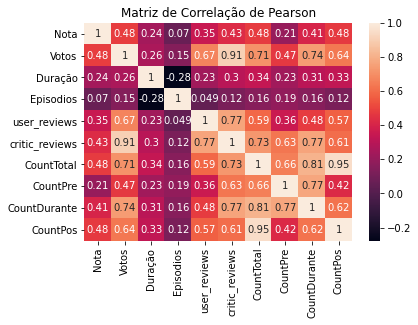

In [26]:
dadoscorr = dados[['Nota', 'Votos', 'Duração', 'Episodios', 'user_reviews', 'critic_reviews', 'CountTotal', 'CountPre', 'CountDurante', 'CountPos']]
correlation_mat = dadoscorr.corr(method="pearson")

heatcorr = sns.heatmap(correlation_mat, annot = True)
heatcorr.set_title("Matriz de Correlação de Pearson")

plt.show()

## Nota

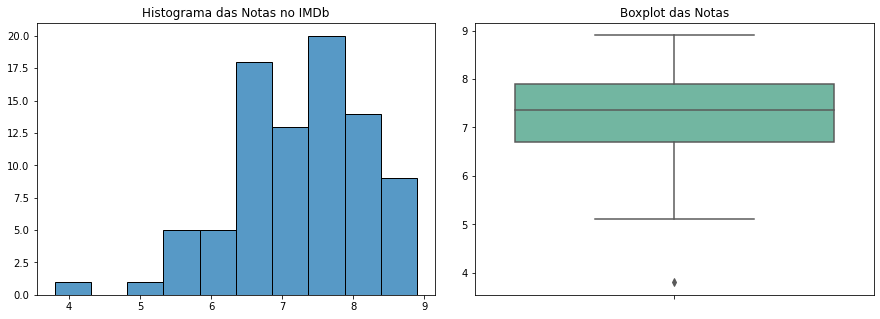

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.histplot(ax=axes[0], x = "Nota", data = dados)
sns.set_palette("Set2")
axes[0].set(xlabel = None, ylabel = None, title = 'Histograma das Notas no IMDb')
axes[0].tick_params(axis='x', rotation = 0)

sns.boxplot(ax=axes[1], y = 'Nota', data = dados)
sns.set_palette("Set2")
axes[1].set(xlabel = None, ylabel = None, title = 'Boxplot das Notas')
axes[1].tick_params(axis='x', rotation = 0)

### Nota x Ano de Lançamento

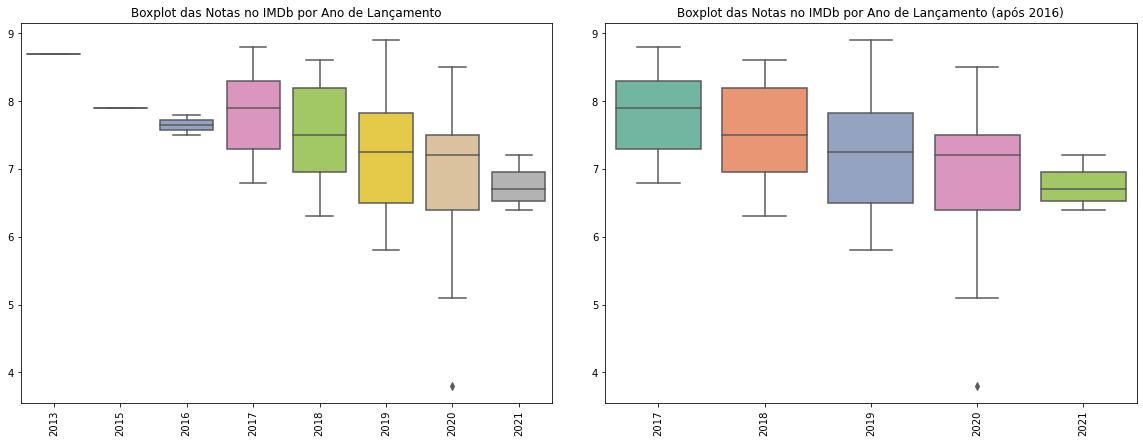

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.boxplot(ax=axes[0], x = dados['Ano'], y = dados['Nota'], data=dados)
sns.set_palette("Set2")
axes[0].set(xlabel=None, ylabel=None, title = 'Boxplot das Notas no IMDb por Ano de Lançamento')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.boxplot(ax=axes[1], x = 'Ano', y = 'Nota', data = dados[dados['Ano']>2016])
sns.set_palette("Set2")
axes[1].set(xlabel=None, ylabel=None, title = 'Boxplot das Notas no IMDb por Ano de Lançamento (após 2016)')
axes[1].tick_params(axis = 'x', rotation = 90)

### Nota x Gênero

In [29]:
df_aux = getCountParam(dados)

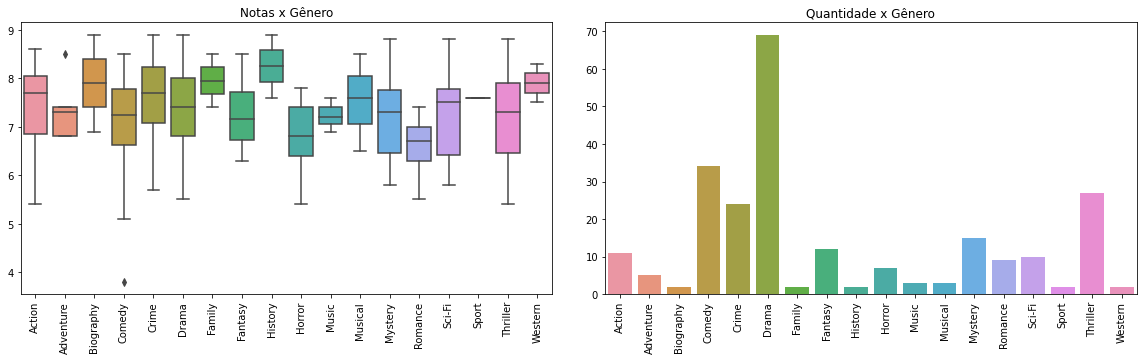

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.set_palette("Set2")
sns.boxplot(ax=axes[0], x = 'Gênero', y = 'Nota', data = df_aux)
axes[0].set(xlabel=None, ylabel=None, title = 'Notas x Gênero')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.set_palette("Set2")
sns.countplot(ax=axes[1],x = 'Gênero', data = df_aux)
axes[1].set(xlabel=None, ylabel=None, title = 'Quantidade x Gênero')
axes[1].tick_params(axis = 'x', rotation = 90)

### Nota x Número Total de Tweets

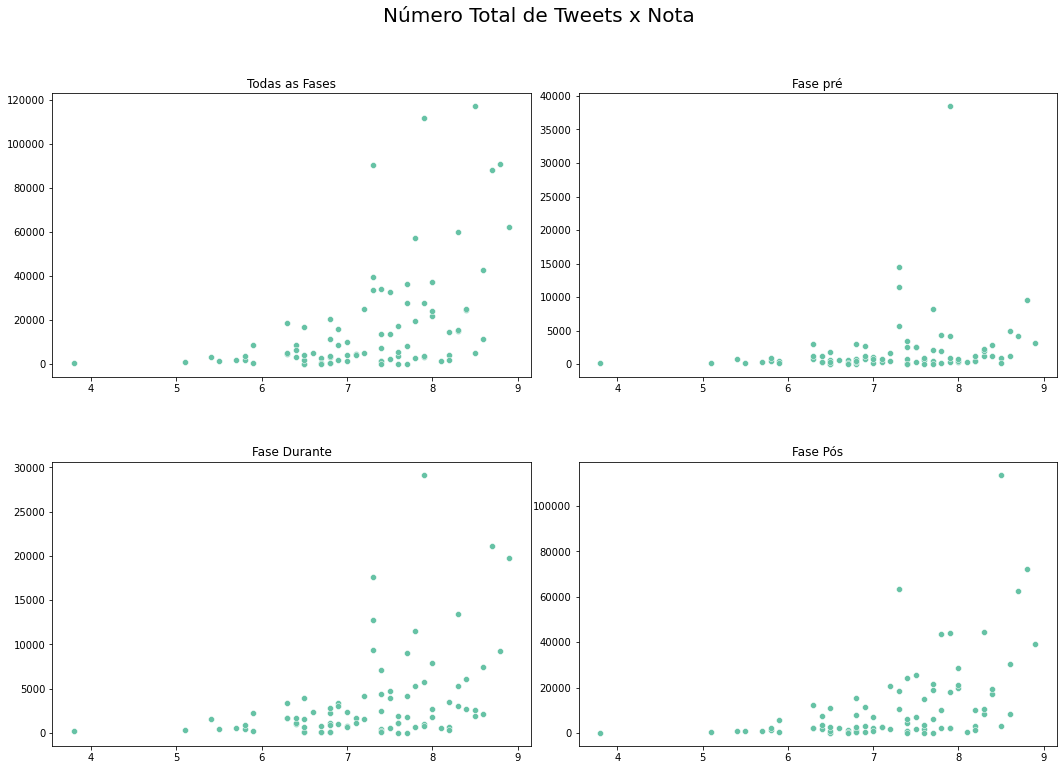

In [31]:
tit = "Número Total de Tweets x Nota"
x1 = "Nota"
x2 = x3 = x4 = x1
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, x2 = x2, x3 = x3, x4 = x4, tipo = 'scatter')

### Nota x País

In [32]:
df_aux = getCountParam(dados, nome_col2 = 'País', inicio = "Argentina", fim = "United States")

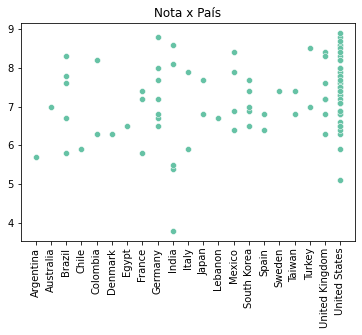

In [33]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.scatterplot(x="País",y="Nota", data=df_aux)
ax.set(xlabel = None, ylabel = None, title = "Nota x País")
ax.tick_params(axis = 'x', rotation = 90)

### Nota x Episódios

In [34]:
#fig, ax = plt.subplots()
#sns.scatterplot(x="Episodios",y="Nota", data=dados)
#ax.set(xlabel = None, ylabel = None, title = "Nota x Episódios")
#ax.tick_params(axis = 'x', rotation = 90)

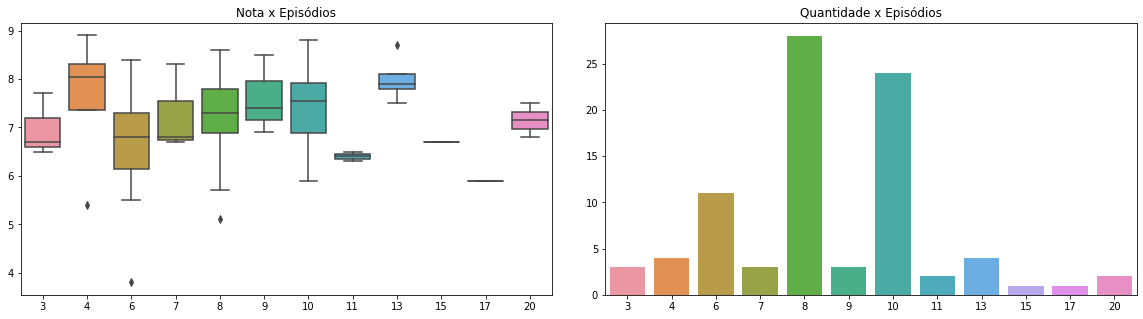

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.set_palette("Set2")
sns.boxplot(ax=axes[0], x = "Episodios", y = "Nota", data = dados)
axes[0].set(xlabel=None, ylabel=None, title = 'Nota x Episódios')
axes[0].tick_params(axis = 'x', rotation = 0)

sns.set_palette("Set2")
sns.countplot(ax=axes[1], x = "Episodios", data = dados)
axes[1].set(xlabel=None, ylabel=None, title = 'Quantidade x Episódios')
axes[1].tick_params(axis = 'x', rotation = 0)

## Tipo de Série

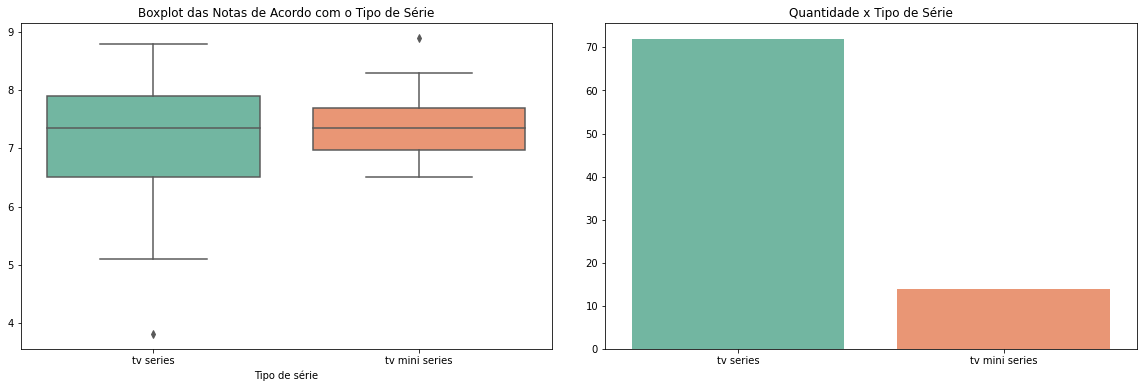

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(20,6), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.set_palette("Set2")
sns.boxplot(ax=axes[0], x = "Check", y = "Nota", data = dados)
axes[0].set(xlabel = 'Tipo de série', ylabel = None, title = "Boxplot das Notas de Acordo com o Tipo de Série")
axes[0].tick_params(axis = 'x', rotation = 0)

sns.set_palette("Set2")
sns.countplot(ax=axes[1], x = "Check", data = dados)
axes[1].set(xlabel=None, ylabel=None, title = 'Quantidade x Tipo de Série')
axes[1].tick_params(axis = 'x', rotation = 0)

### Tipo de Série x Votos

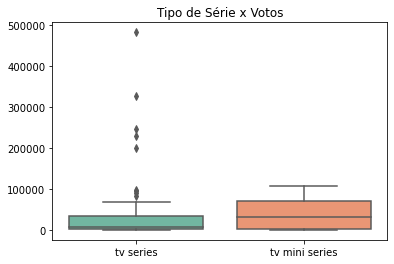

In [37]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(x = "Check", y = "Votos", data = dados)
ax.set(xlabel = None, ylabel = None, title = "Tipo de Série x Votos")
ax.tick_params(axis = 'x', rotation = 0)

### Tipo de Série x Duração

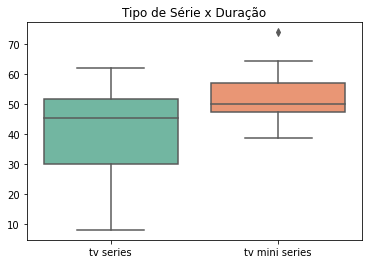

In [38]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(x = "Check", y = "Duração", data = dados)
ax.set(xlabel = None, ylabel = None, title = "Tipo de Série x Duração")
ax.tick_params(axis = 'x', rotation = 0)

### Tipo de Série x Número de Episódios

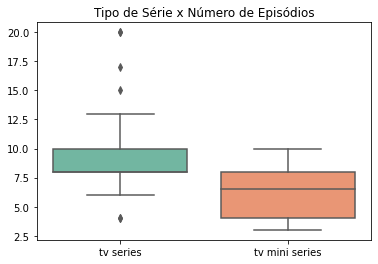

In [39]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(x = "Check", y = "Episodios", data = dados)
ax.set(xlabel = None, ylabel = None, title = "Tipo de Série x Número de Episódios")
ax.tick_params(axis = 'x', rotation = 0)

## Votos

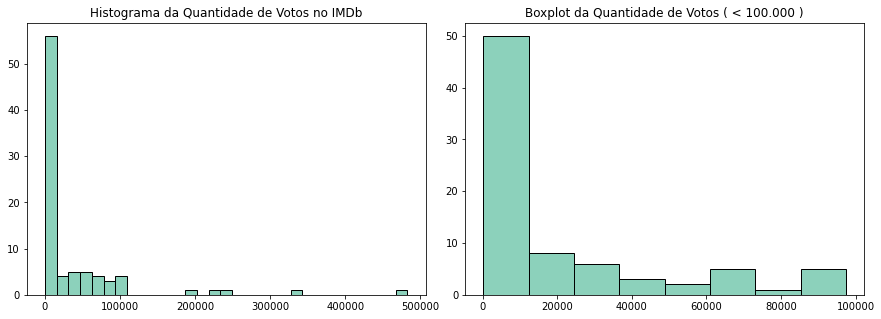

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.histplot(ax=axes[0], x = "Votos", data = dados)
sns.set_palette("Set2")
axes[0].set(xlabel = None, ylabel = None, title = 'Histograma da Quantidade de Votos no IMDb')
axes[0].tick_params(axis='x', rotation = 0)

sns.histplot(ax=axes[1], x = "Votos", data = dados[dados['Votos']<100000])
sns.set_palette("Set2")
axes[1].set(xlabel = None, ylabel = None, title = 'Boxplot da Quantidade de Votos ( < 100.000 )')
axes[1].tick_params(axis='x', rotation = 0)

### Votos x Nota

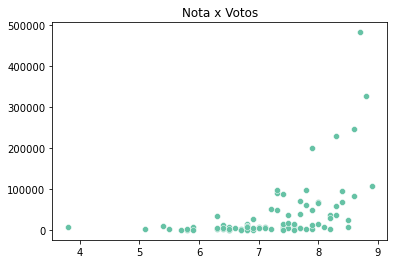

In [41]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.scatterplot(x = "Nota", y = "Votos", data = dados)
ax.set(xlabel = None, ylabel = None, title = "Nota x Votos")
ax.tick_params(axis = 'x', rotation = 0)

### Votos x Ano

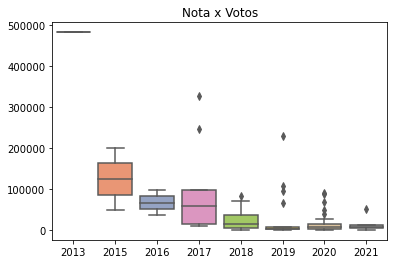

In [42]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(x = "Ano", y = "Votos", data = dados)
ax.set(xlabel = None, ylabel = None, title = "Nota x Votos")
ax.tick_params(axis = 'x', rotation = 0)

### Votos x País

In [43]:
df_aux = getCountParam(dados, tipocount = 'Votos', nome_col1 = 'Votos', nome_col2 = 'País', inicio = "Argentina", fim = "United States")

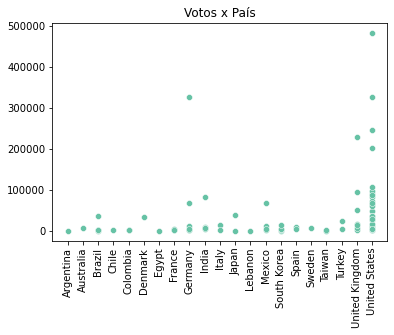

In [44]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.scatterplot(x = "País", y = "Votos", data=df_aux)
ax.set(xlabel = None, ylabel = None, title = "Votos x País")
ax.tick_params(axis = 'x', rotation = 90)

### Votos x Número de Episódios

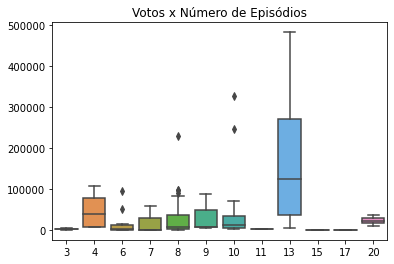

In [45]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(x = "Episodios", y = "Votos", data = dados)
ax.set(xlabel = None, ylabel = None, title = "Votos x Número de Episódios")
ax.tick_params(axis = 'x', rotation = 0)

### Votos x Reviews

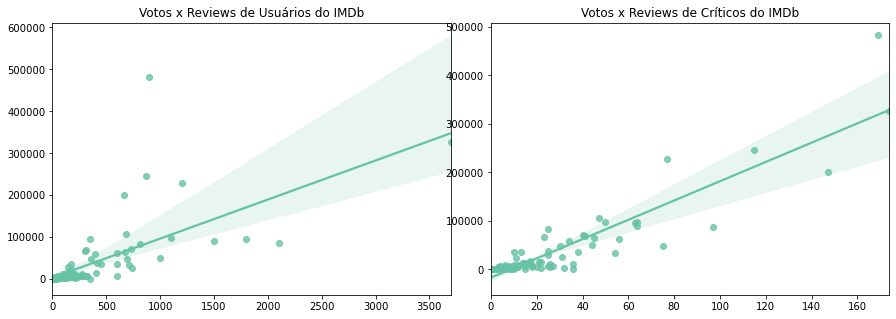

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.regplot(ax=axes[0], x = "user_reviews", y="Votos", data = dados)
sns.set_palette("Set2")
axes[0].set(xlabel = None, ylabel = None, title = 'Votos x Reviews de Usuários do IMDb')
axes[0].tick_params(axis='x', rotation = 0)

sns.regplot(ax=axes[1], x = "critic_reviews", y="Votos", data = dados)
sns.set_palette("Set2")
axes[1].set(xlabel = None, ylabel = None, title = 'Votos x Reviews de Críticos do IMDb')
axes[1].tick_params(axis='x', rotation = 0)

## Duração

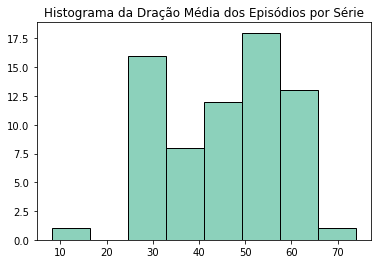

In [47]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.histplot(x = "Duração", data = dados)
ax.set(xlabel = None, ylabel = None, title = 'Histograma da Dração Média dos Episódios por Série')
ax.tick_params(axis = 'x', rotation = 0)

### Duração x Votos

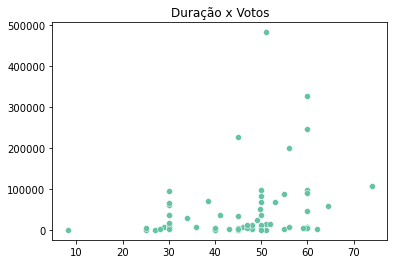

In [48]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.scatterplot(data=dados, x="Duração", y="Votos")
ax.set(xlabel = None, ylabel = None, title = 'Duração x Votos')
ax.tick_params(axis = 'x', rotation = 0)

### Duração x Ano

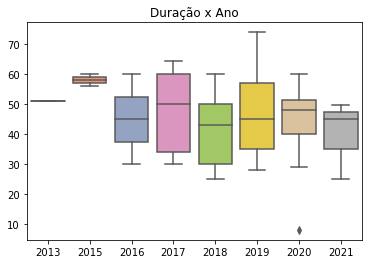

In [49]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(data=dados,  x = "Ano", y = "Duração")
ax.set(xlabel = None, ylabel = None, title = 'Duração x Ano')
ax.tick_params(axis = 'x', rotation = 0)

## Ano

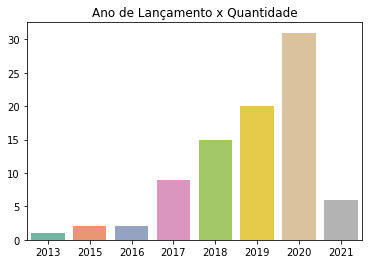

In [50]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.countplot(data=dados,  x = "Ano")
ax.set(xlabel = None, ylabel = None, title = 'Ano de Lançamento x Quantidade')
ax.tick_params(axis = 'x', rotation = 0)

## Data de estréia

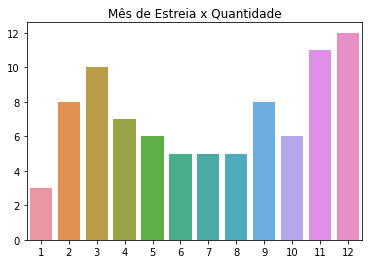

In [51]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.countplot(data=dados,  x = "mes")
ax.set(xlabel = None, ylabel = None, title = 'Mês de Estreia x Quantidade')
ax.tick_params(axis = 'x', rotation = 0)

## País

In [52]:
df_aux = getCountParam(dados, tipocount = 'Votos', nome_col1 = 'Votos', nome_col2 = 'País', inicio = "Argentina", fim = "United States")

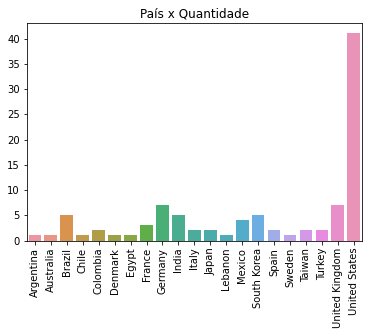

In [53]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.countplot(data = df_aux,  x = "País")
ax.set(xlabel = None, ylabel = None, title = 'País x Quantidade')
ax.tick_params(axis = 'x', rotation = 90)

## Idiomas

In [54]:
df_aux = getCountParam(dados, tipocount = 'Votos', nome_col1 = 'Votos',
                       nome_col2 = 'Idiomas', inicio = "Arabic", fim = "Yiddish")

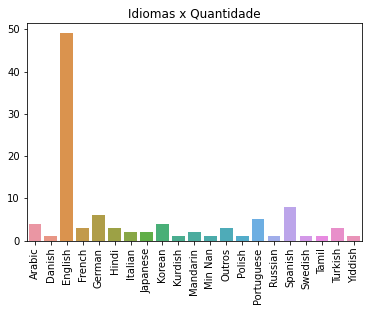

In [55]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.countplot(data = df_aux,  x = "Idiomas")
ax.set(xlabel = None, ylabel = None, title = 'Idiomas x Quantidade')
ax.tick_params(axis = 'x', rotation = 90)

## Número de Episódios

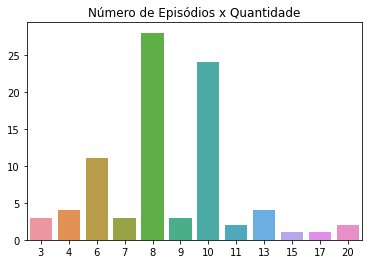

In [56]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.countplot(data = dados,  x = "Episodios")
ax.set(xlabel = None, ylabel = None, title = 'Número de Episódios x Quantidade')
ax.tick_params(axis = 'x', rotation = 0)

## Reviews de Usuários

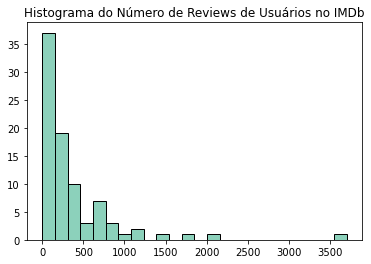

In [57]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.histplot(x = "user_reviews", data = dados)
ax.set(xlabel = None, ylabel = None, title = 'Histograma do Número de Reviews de Usuários no IMDb')
ax.tick_params(axis = 'x', rotation = 0)

### Reviews de Usuários x Ano

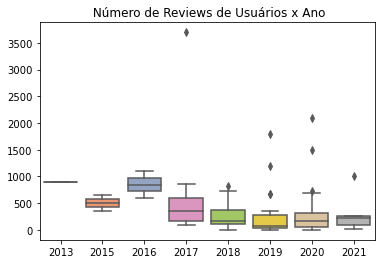

In [58]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(data=dados,  x = "Ano", y = "user_reviews")
ax.set(xlabel = None, ylabel = None, title = ' Número de Reviews de Usuários x Ano')
ax.tick_params(axis = 'x', rotation = 0)

### Reviews de Usuários x Tipo de Série

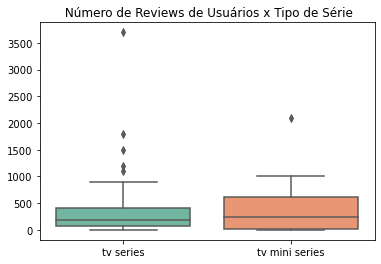

In [59]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(data=dados,  x = "Check", y = "user_reviews")
ax.set(xlabel = None, ylabel = None, title = ' Número de Reviews de Usuários x Tipo de Série')
ax.tick_params(axis = 'x', rotation = 0)

## Reviews de Críticos

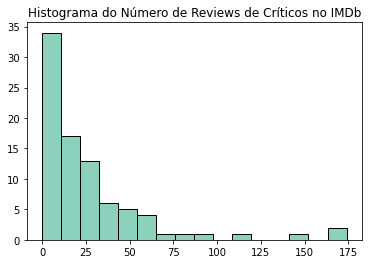

In [60]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.histplot(x = "critic_reviews", data = dados)
ax.set(xlabel = None, ylabel = None, title = 'Histograma do Número de Reviews de Críticos no IMDb')
ax.tick_params(axis = 'x', rotation = 0)

### Reviews de Críticos x Ano

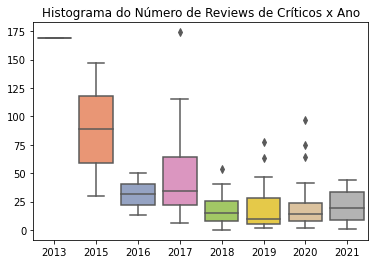

In [61]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(data=dados,  x = "Ano", y = "critic_reviews")
ax.set(xlabel = None, ylabel = None, title = 'Histograma do Número de Reviews de Críticos x Ano')
ax.tick_params(axis = 'x', rotation = 0)

### Reviews de Críticos x Tipo de Série

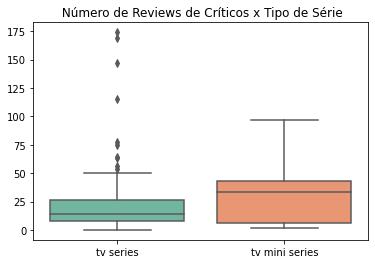

In [62]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.boxplot(data=dados,  x = "Check", y = "critic_reviews")
ax.set(xlabel = None, ylabel = None, title = ' Número de Reviews de Críticos x Tipo de Série')
ax.tick_params(axis = 'x', rotation = 0)

## Agrupando alguns gráficos

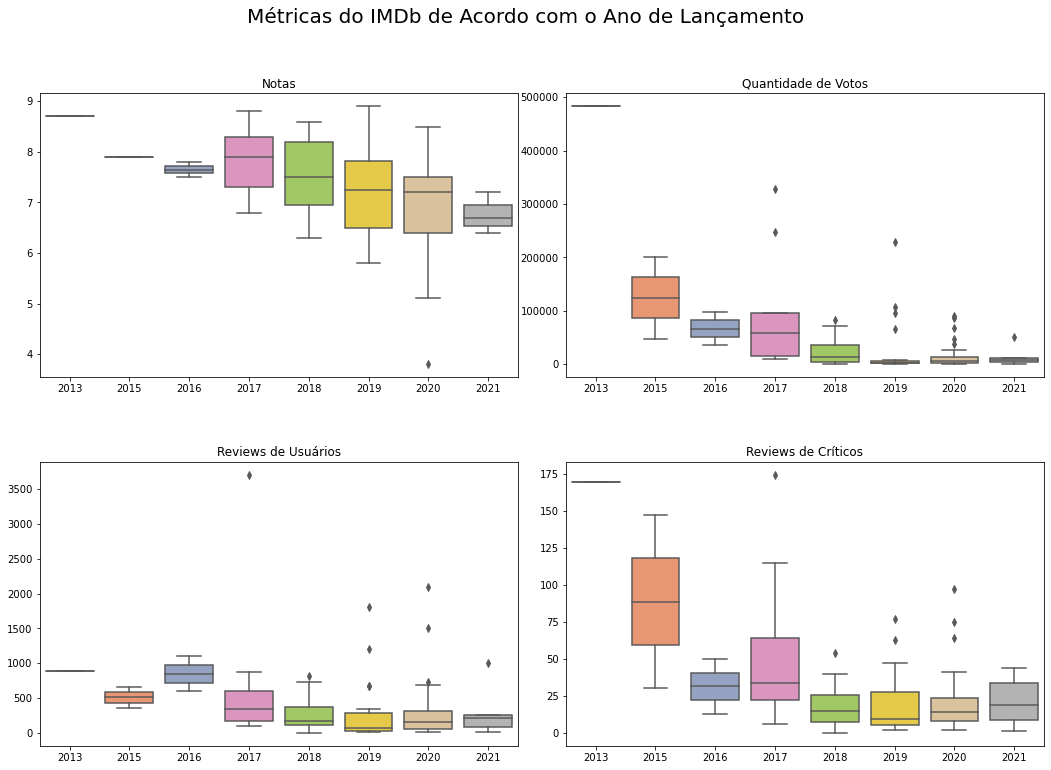

In [63]:
titulo = 'Métricas do IMDb de Acordo com o Ano de Lançamento'
x1 = "Ano"
y1 = "Nota"
y2 = "Votos"
y3 = "user_reviews"
y4 = "critic_reviews"
t1 = 'Notas'
t2 = 'Quantidade de Votos'
t3 = 'Reviews de Usuários'
t4 = 'Reviews de Críticos'

plot_2x2(titulo, dados, dados, dados, dados,
                x1, y1 = y1, t1 = t1,
                x2 = '', y2 = y2, t2 = t2,
                x3 = '', y3 = y3, t3 = t3,
                x4 = '', y4 = y4, t4 = t4)

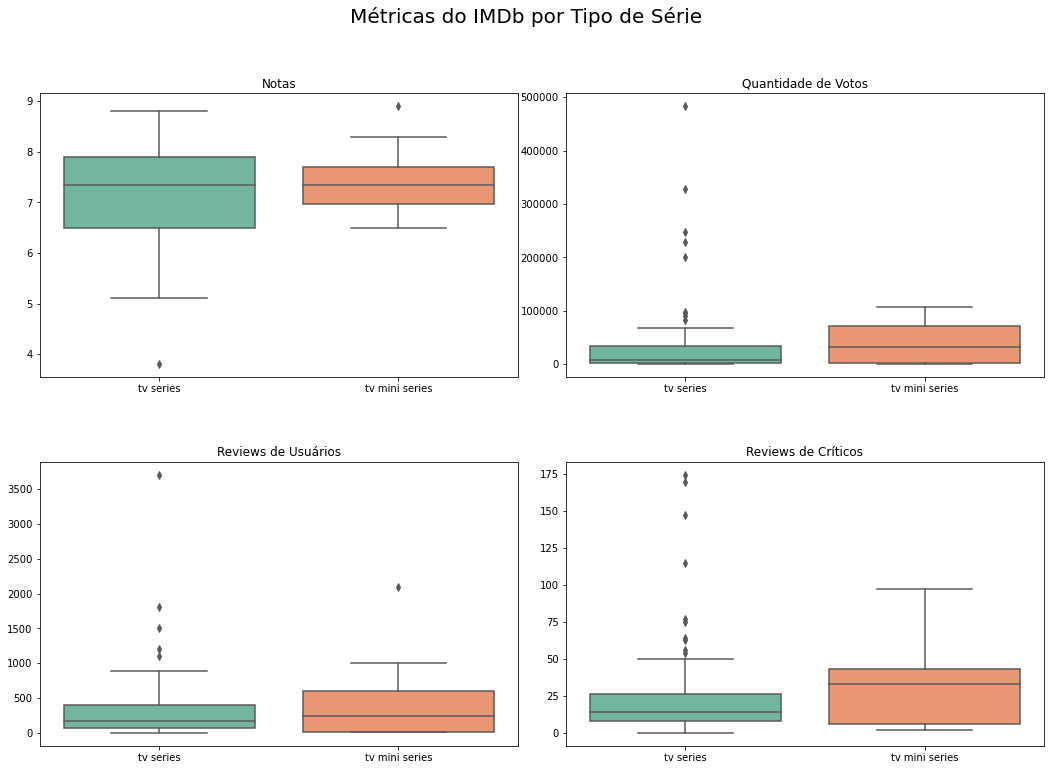

In [64]:
titulo = 'Métricas do IMDb por Tipo de Série'
x1 = "Check"
y1 = "Nota"
y2 = "Votos"
y3 = "user_reviews"
y4 = "critic_reviews"
t1 = 'Notas'
t2 = 'Quantidade de Votos'
t3 = 'Reviews de Usuários'
t4 = 'Reviews de Críticos'

plot_2x2(titulo, dados, dados, dados, dados,
                x1, y1 = y1, t1 = t1,
                x2 = '', y2 = y2, t2 = t2,
                x3 = '', y3 = y3, t3 = t3,
                x4 = '', y4 = y4, t4 = t4)

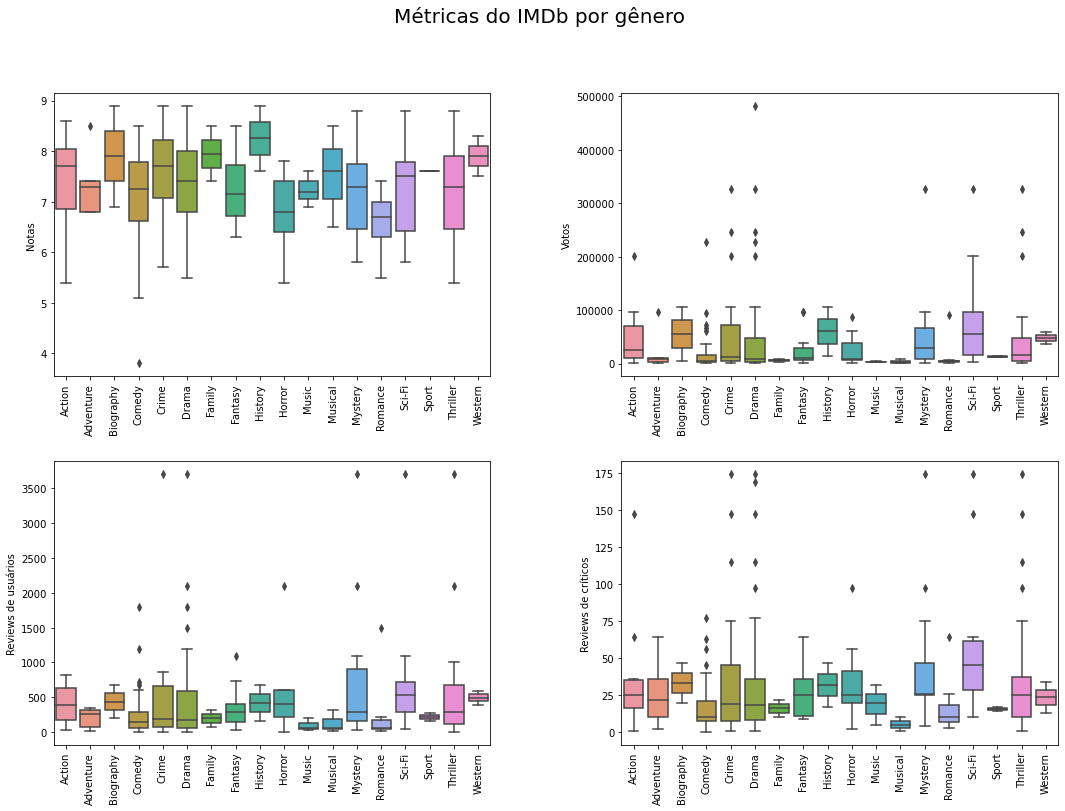

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=False)
fig.suptitle('Métricas do IMDb por gênero', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.3)

sns.set_palette("Set2")

gen_nota = getCountParam(dados, tipocount = 'Nota', nome_col1 = 'Nota', nome_col2 = 'Gênero', inicio = "Action", fim = "Western")
sns.boxplot(ax = axes[0,0], x = 'Gênero', y = 'Nota', data = gen_nota)
axes[0,0].set(ylabel='Notas', xlabel=None, title = None)
axes[0,0].tick_params(axis = 'x', rotation = 90)


gen_votos = getCountParam(dados, tipocount = 'Votos', nome_col1 = 'Votos', nome_col2 = 'Gênero', inicio = "Action", fim = "Western")
sns.boxplot(ax = axes[0,1], x = 'Gênero', y = 'Votos', data = gen_votos)
axes[0,1].set(ylabel='Votos', xlabel=None, title =None)
axes[0,1].tick_params(axis = 'x', rotation = 90)


gen_user = getCountParam(dados, tipocount = 'user_reviews', nome_col1 = 'user_reviews', nome_col2 = 'Gênero', inicio = "Action", fim = "Western")
sns.boxplot(ax=axes[1,0], x = 'Gênero', y = 'user_reviews', data = gen_user)
axes[1,0].set(ylabel='Reviews de usuários', xlabel=None, title = None)
axes[1,0].tick_params(axis = 'x', rotation = 90)


gen_critic = getCountParam(dados, tipocount = 'critic_reviews', nome_col1 = 'critic_reviews', nome_col2 = 'Gênero', inicio = "Action", fim = "Western")

sns.boxplot(ax=axes[1,1], x = 'Gênero', y = 'critic_reviews', data = gen_critic)
axes[1,1].set(ylabel='Reviews de críticos', xlabel=None, title = None)
axes[1,1].tick_params(axis = 'x', rotation = 90)




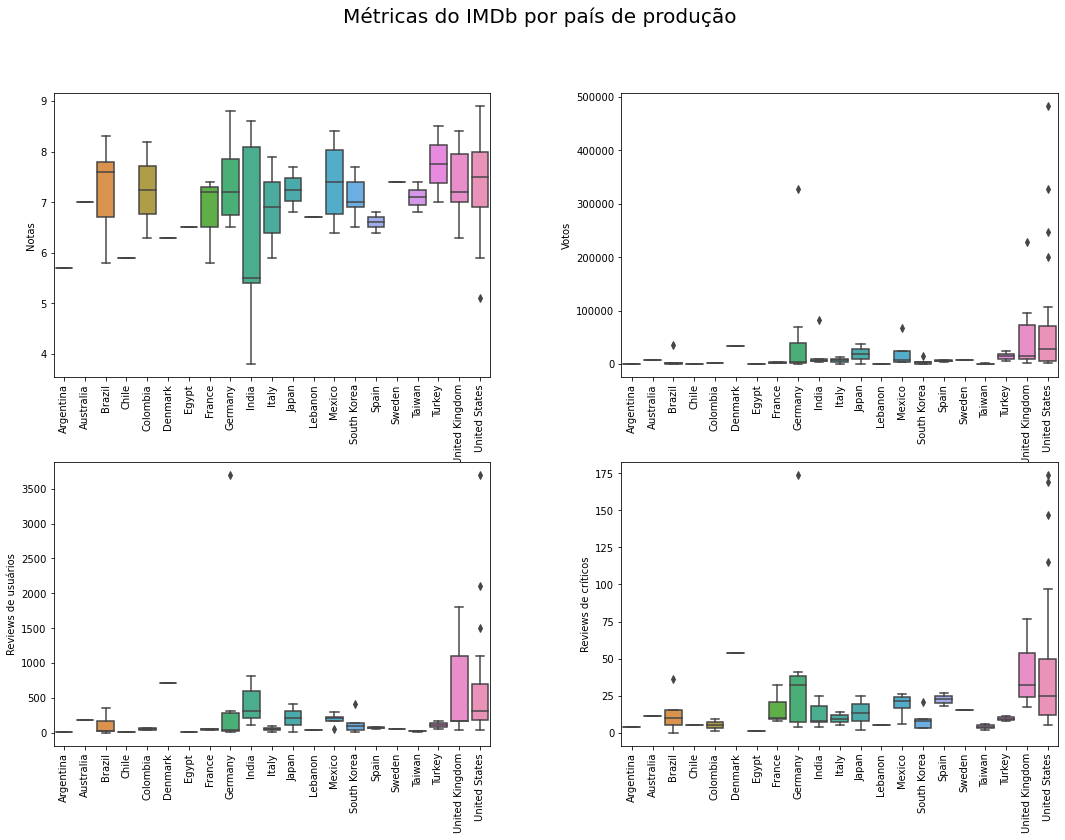

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=False)
fig.suptitle('Métricas do IMDb por país de produção', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.3)

sns.set_palette("Set2")
pais_nota = getCountParam(dados, tipocount = "Nota", nome_col1 = 'Nota', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
sns.boxplot(ax = axes[0,0], x = 'País', y = 'Nota', data = pais_nota)
axes[0,0].set(ylabel='Notas', xlabel=None, title = None)
axes[0,0].tick_params(axis = 'x', rotation = 90)


pais_votos = getCountParam(dados, tipocount = "Votos", nome_col1 = 'Votos', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
sns.boxplot(ax = axes[0,1], x = 'País', y = 'Votos', data = pais_votos)
axes[0,1].set(ylabel='Votos', xlabel=None, title =None)
axes[0,1].tick_params(axis = 'x', rotation = 90)


pais_user = getCountParam(dados, tipocount = "user_reviews", nome_col1 = 'user_reviews', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
sns.boxplot(ax=axes[1,0], x = 'País', y = 'user_reviews', data = pais_user)
axes[1,0].set(ylabel='Reviews de usuários', xlabel=None, title = None)
axes[1,0].tick_params(axis = 'x', rotation = 90)


pais_critic = getCountParam(dados, tipocount = "critic_reviews", nome_col1 = 'critic_reviews', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
sns.boxplot(ax=axes[1,1], x = 'País', y = 'critic_reviews', data = pais_critic)
axes[1,1].set(ylabel='Reviews de críticos', xlabel=None, title = None)
axes[1,1].tick_params(axis = 'x', rotation = 90)


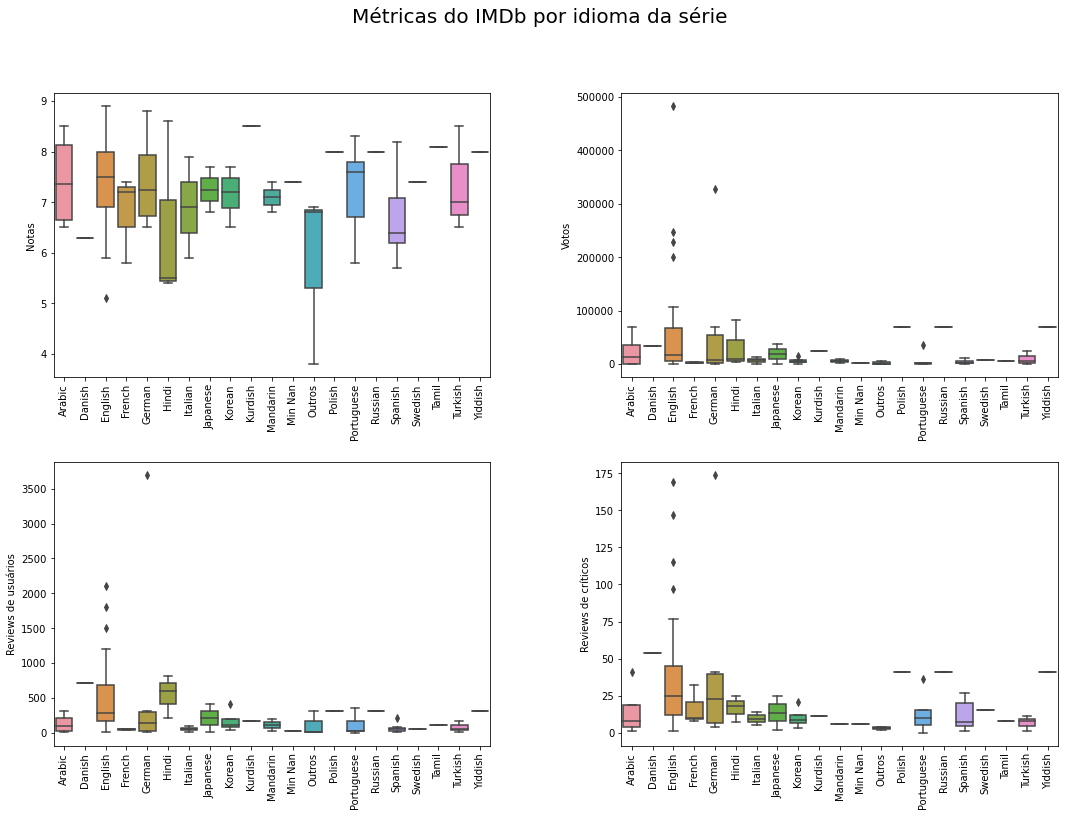

In [67]:
inicio = "Arabic"
fim = "Yiddish"

fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=False)
fig.suptitle('Métricas do IMDb por idioma da série', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.3)

sns.set_palette("Set2")
idi_nota = getCountParam(dados, tipocount = "Nota", nome_col1 = 'Nota', nome_col2 = 'Idioma', inicio = inicio, fim = fim)
sns.boxplot(ax = axes[0,0], x = 'Idioma', y = 'Nota', data = idi_nota)
axes[0,0].set(ylabel='Notas', xlabel=None, title = None)
axes[0,0].tick_params(axis = 'x', rotation = 90)



idi_votos = getCountParam(dados, tipocount = "Votos", nome_col1 = 'Votos', nome_col2 = 'Idioma', inicio = inicio, fim = fim)
sns.boxplot(ax = axes[0,1], x = 'Idioma', y = 'Votos', data = idi_votos)
axes[0,1].set(ylabel='Votos', xlabel=None, title =None)
axes[0,1].tick_params(axis = 'x', rotation = 90)


idi_user = getCountParam(dados, tipocount = "user_reviews", nome_col1 = 'user_reviews', nome_col2 = 'Idioma', inicio = inicio, fim = fim)
sns.boxplot(ax=axes[1,0], x = 'Idioma', y = 'user_reviews', data = idi_user)
axes[1,0].set(ylabel='Reviews de usuários', xlabel=None, title = None)
axes[1,0].tick_params(axis = 'x', rotation = 90)


idi_critic = getCountParam(dados, tipocount = "critic_reviews", nome_col1 = 'critic_reviews', nome_col2 = 'Idioma', inicio = inicio, fim = fim)
sns.boxplot(ax=axes[1,1], x = 'Idioma', y = 'critic_reviews', data = idi_critic)
axes[1,1].set(ylabel='Reviews de críticos', xlabel=None, title = None)
axes[1,1].tick_params(axis = 'x', rotation = 90)


# Engajamento (counts)

## Histogramas do números de tweets em difentes fases (Total, Pré, Durante, Pós)

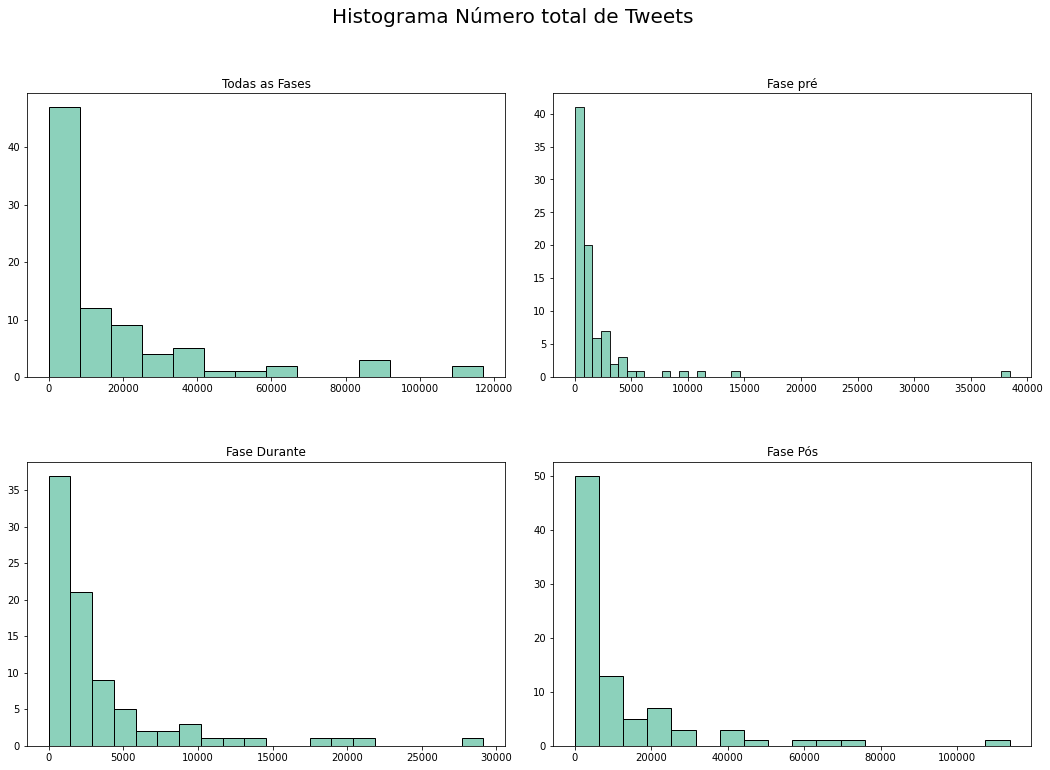

In [68]:
tit = "Histograma Número total de Tweets"
x1 = "CountTotal"
x2 = "CountPre"
x3 = "CountDurante"
x4 = "CountPos"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, x2 = x2, x3 = x3, x4 = x4, tipo = 'hist')

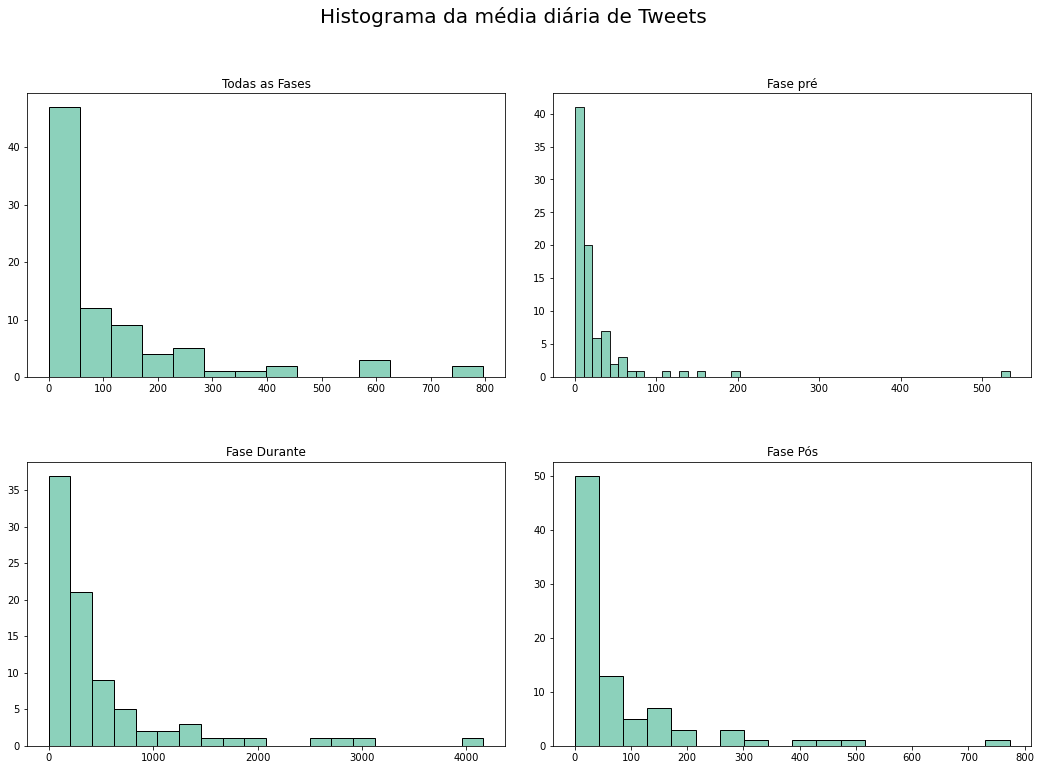

In [69]:
tit = "Histograma da média diária de Tweets"
x1 = "TaxaTotal"
x2 = "TaxaPre"
x3 = "TaxaDurante"
x4 = "TaxaPos"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, x2 = x2, x3 = x3, x4 = x4, tipo = 'hist')

## Total de Tweets x Ano

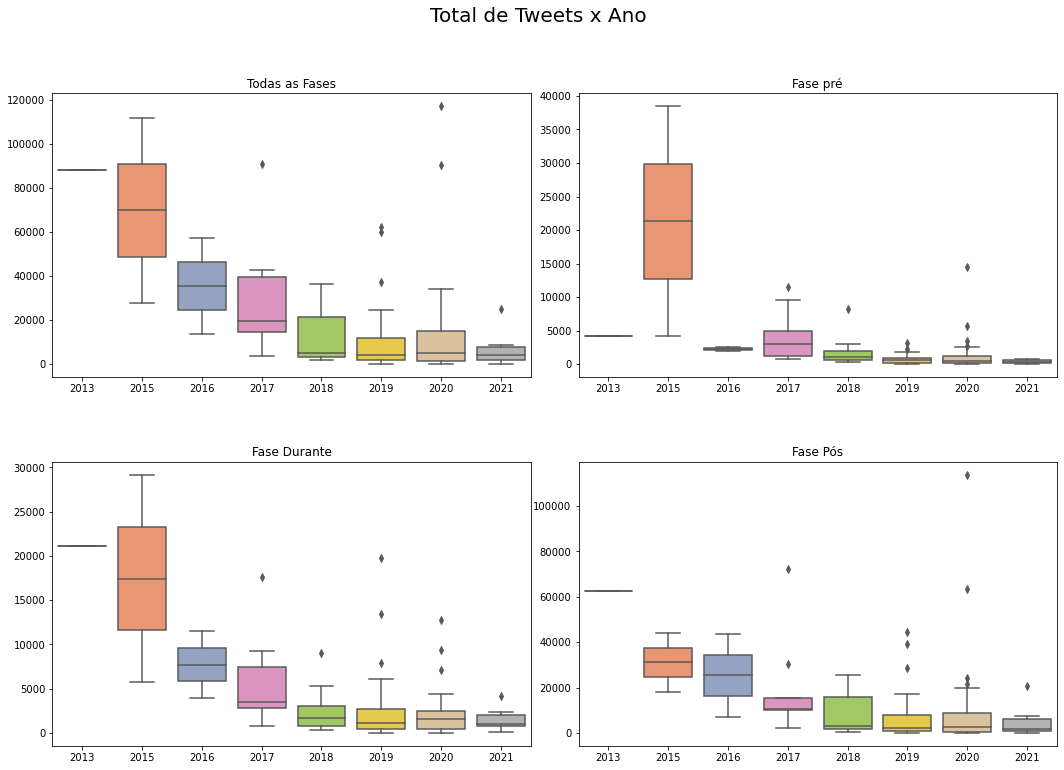

In [70]:
tit = "Total de Tweets x Ano"
x1 = "Ano"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

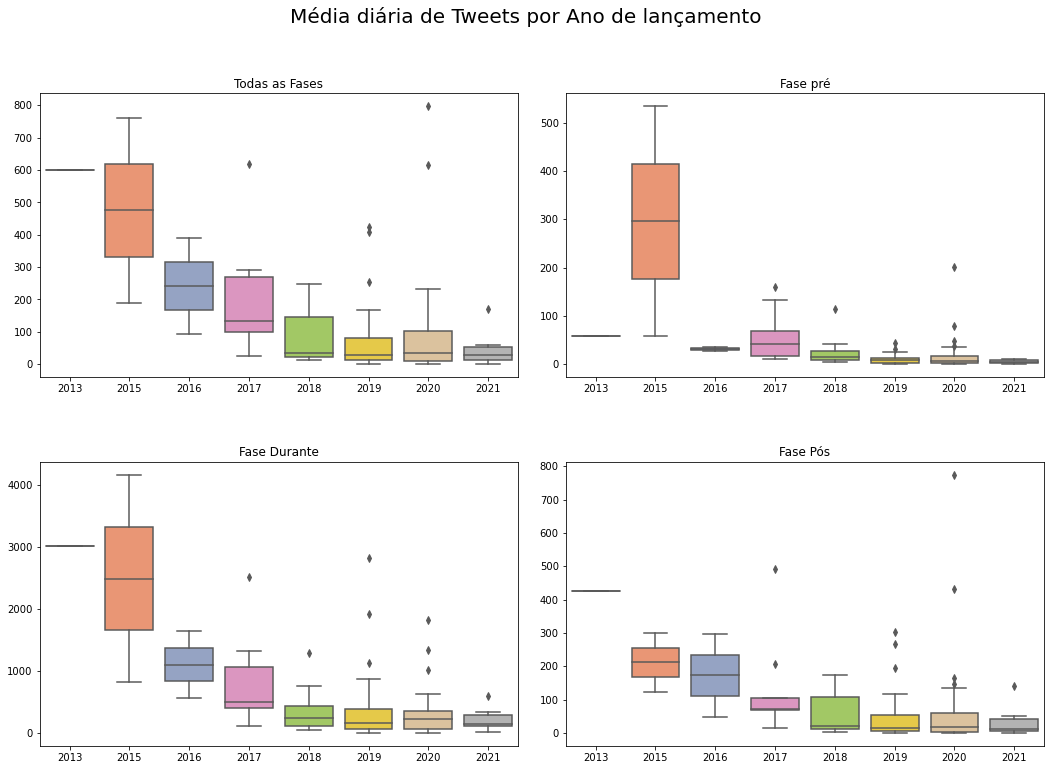

In [71]:
tit = "Média diária de Tweets por Ano de lançamento"
x1 = "Ano"
dado1 = dado2 = dado3 = dado4 = dados
plot_2x2(tit, dado1, dado2, dado3, dado4, x1, y1='TaxaTotal', y2='TaxaPre', y3='TaxaDurante', y4='TaxaPos')

## Total de Tweets x Gênero

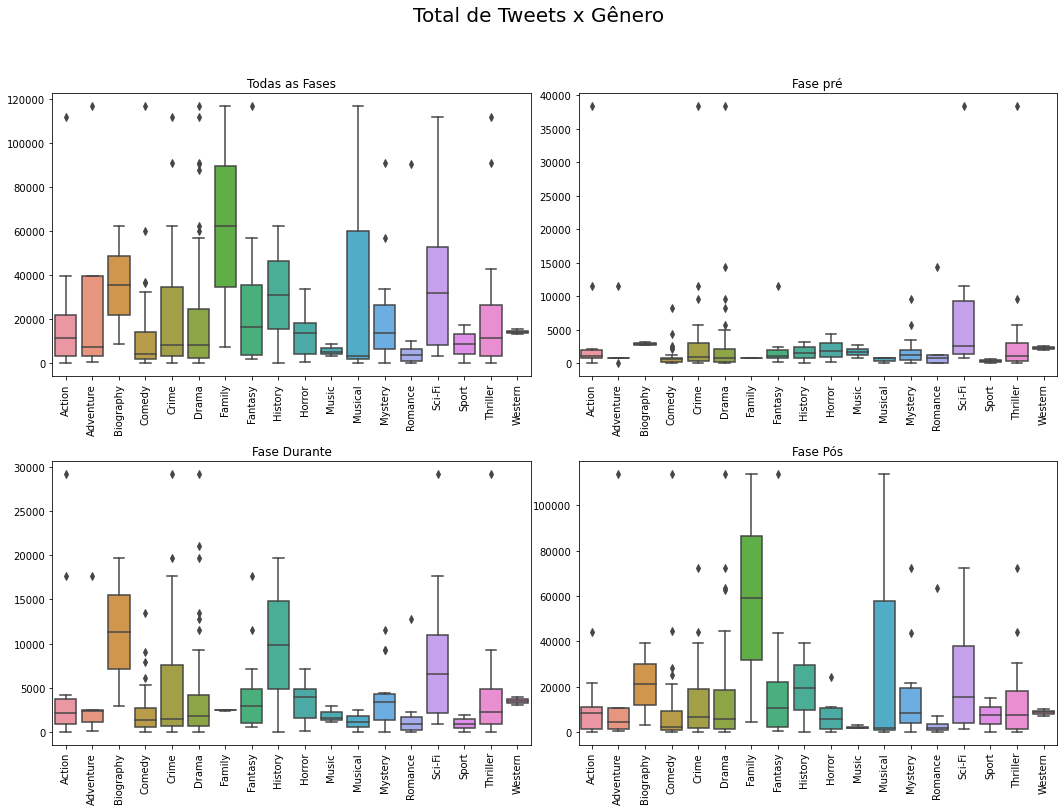

In [72]:
tit = 'Total de Tweets x Gênero'
x1 = 'Gênero'
y1 = 'Count'
dfTotal = getCountParam(dados, tipocount = "CountTotal", nome_col1 = 'Count')     #dfTotal = getCount("CountTotal")
dfPre = getCountParam(dados, tipocount = "CountPre", nome_col1 = 'Count')         #dfPre = getCount("CountPre")
dfDurante = getCountParam(dados, tipocount = "CountDurante", nome_col1 = 'Count') #dfDurante = getCount("CountDurante")
dfPos = getCountParam(dados, tipocount = "CountPos", nome_col1 = 'Count')         #dfPos = getCount("CountPos")

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = False)

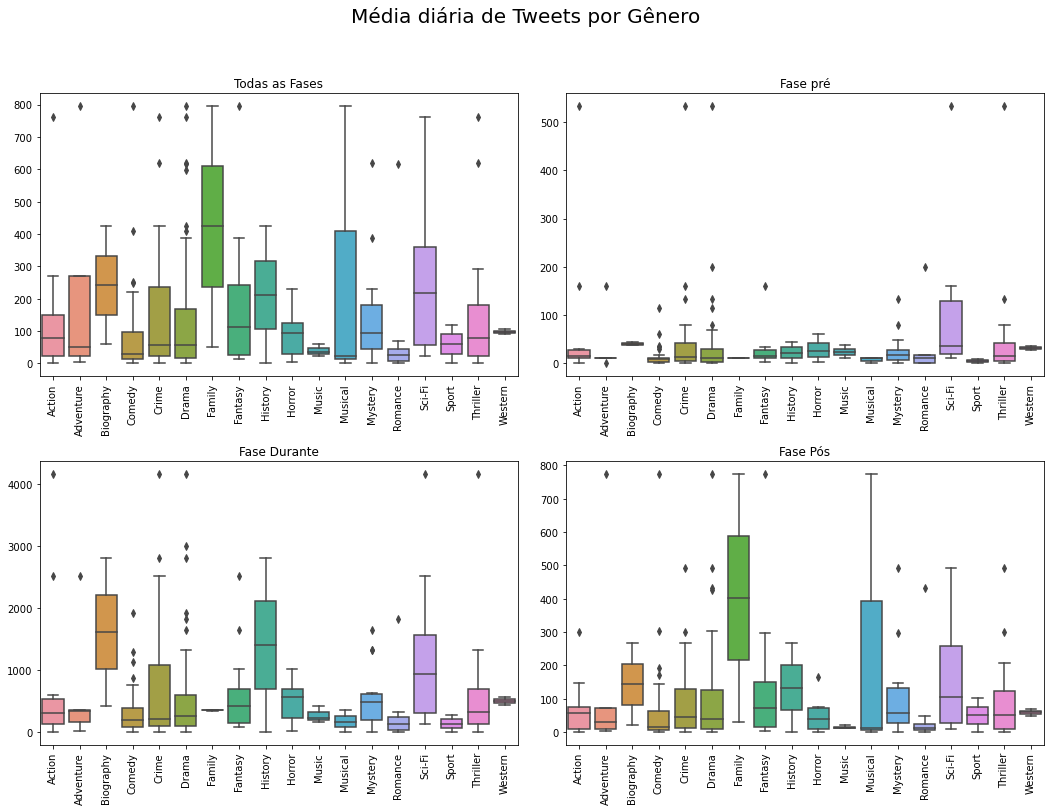

In [73]:
tit = 'Média diária de Tweets por Gênero'
x1 = 'Gênero'
y1 = 'Count'
dfTotal = getCountParam(dados, tipocount = "TaxaTotal", nome_col1 = 'Count')     #dfTotal = getCount("CountTotal")
dfPre = getCountParam(dados, tipocount = "TaxaPre", nome_col1 = 'Count')         #dfPre = getCount("CountPre")
dfDurante = getCountParam(dados, tipocount = "TaxaDurante", nome_col1 = 'Count') #dfDurante = getCount("CountDurante")
dfPos = getCountParam(dados, tipocount = "TaxaPos", nome_col1 = 'Count')         #dfPos = getCount("CountPos")

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90)

In [74]:
dados[dados["CountPre"] > 10000][['Nome','Gênero']]

,Nome,Gênero
9,Jessica Jones,"[Action, Crime, Drama, Sci-Fi, Thriller]"
30,Bridgerton,"[Drama, Romance]"
32,The Defenders,"[Action, Adventure, Crime, Fantasy, Sci-Fi]"


## Total de Tweets x Mês de Estréia

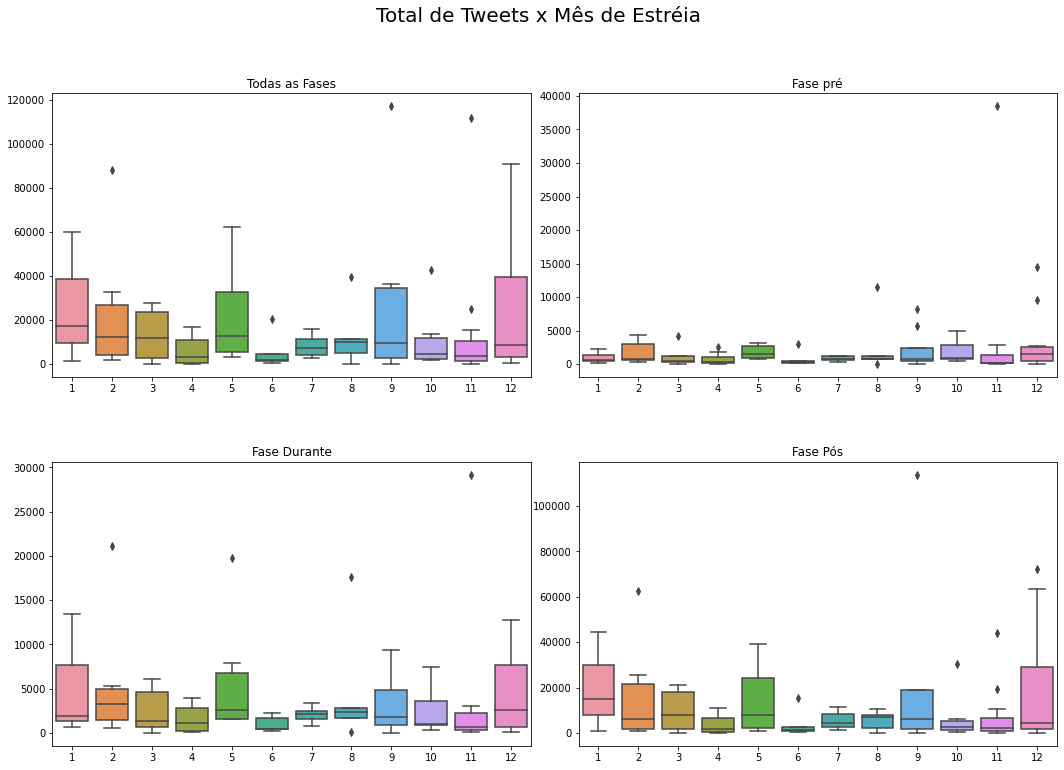

In [75]:
tit = 'Total de Tweets x Mês de Estréia'
x1 = "mes"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x Tipo da Série

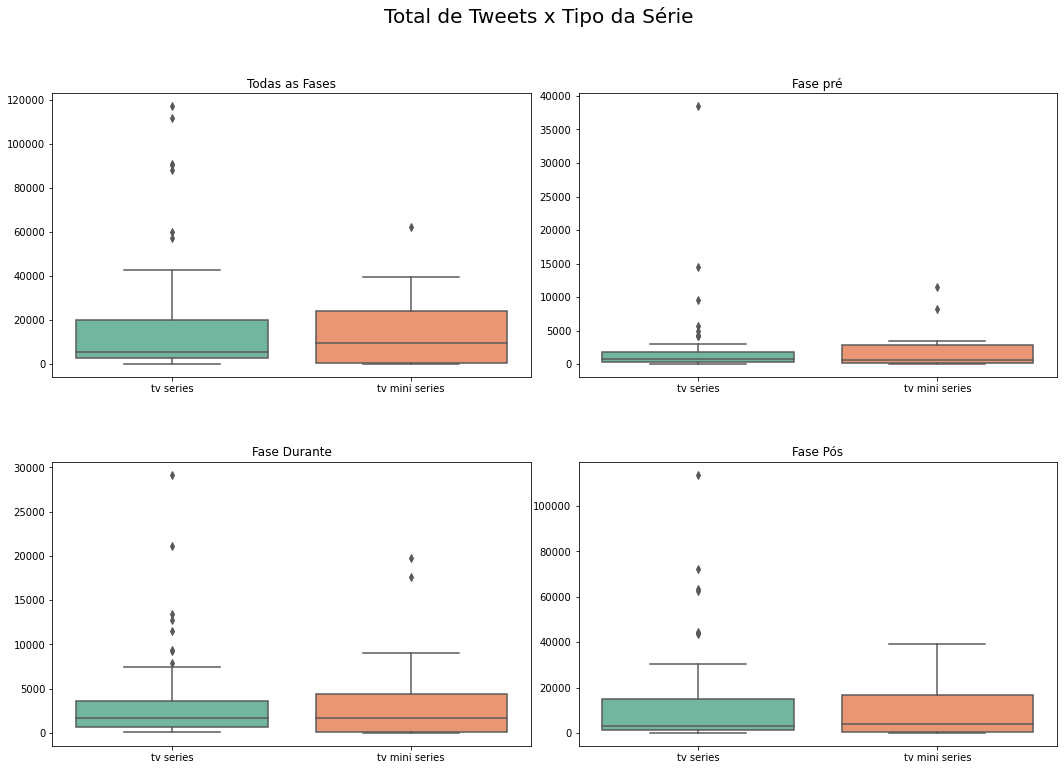

In [76]:
tit = 'Total de Tweets x Tipo da Série'
x1 = "Check"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x Episódios

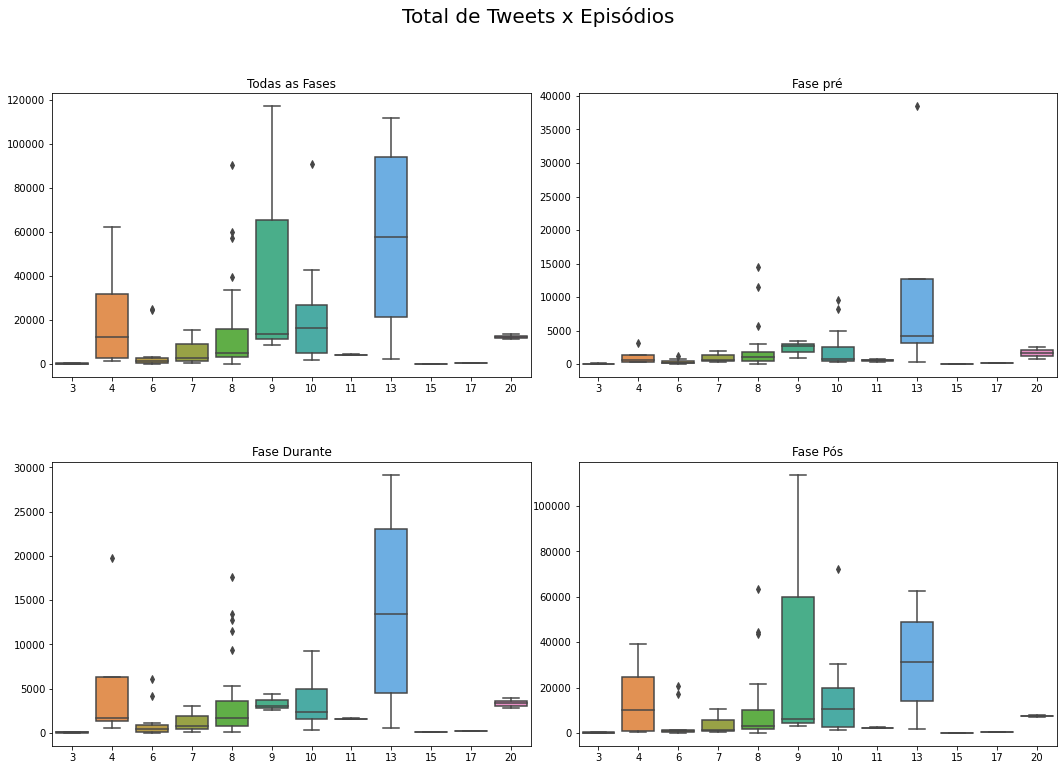

In [77]:
tit = 'Total de Tweets x Episódios'
x1 = "Episodios"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x País

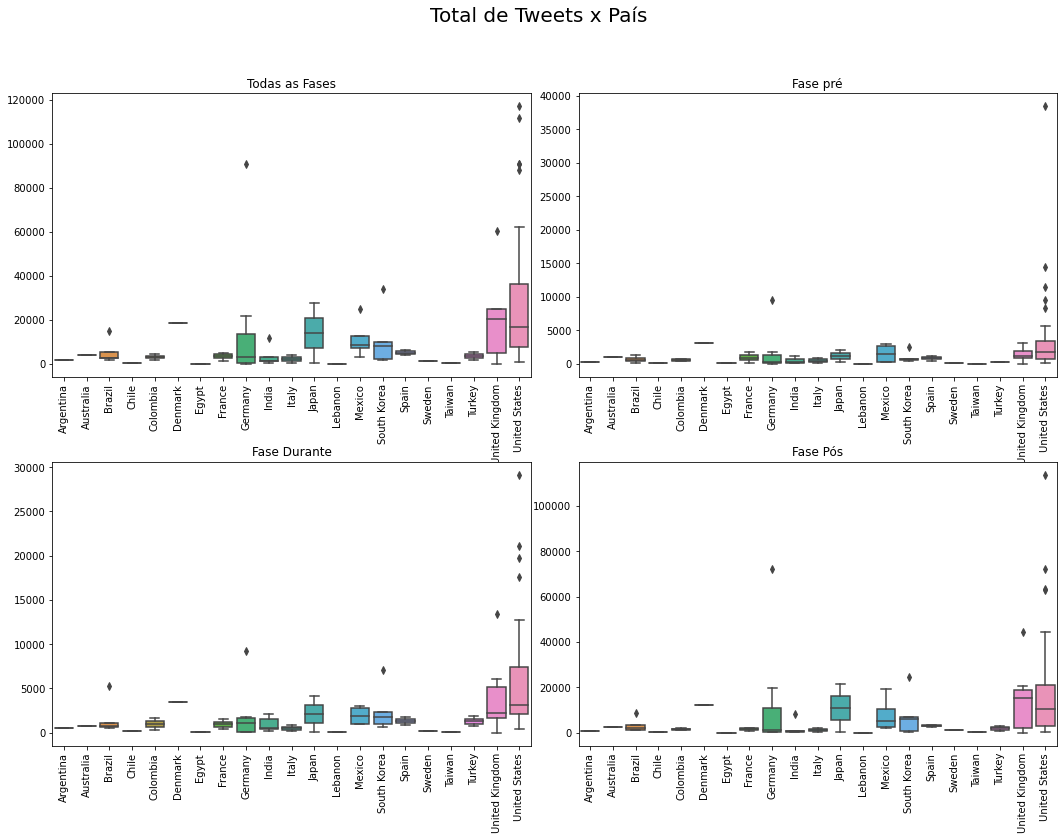

In [78]:
tit = 'Total de Tweets x País'
x1 = 'País'
y1 = 'Count'
dfTotal = getCountParam(dados, tipocount = "CountTotal", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfPre = getCountParam(dados, tipocount = "CountPre", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfDurante = getCountParam(dados, tipocount = "CountDurante", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfPos = getCountParam(dados, tipocount = "CountPos", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = False)

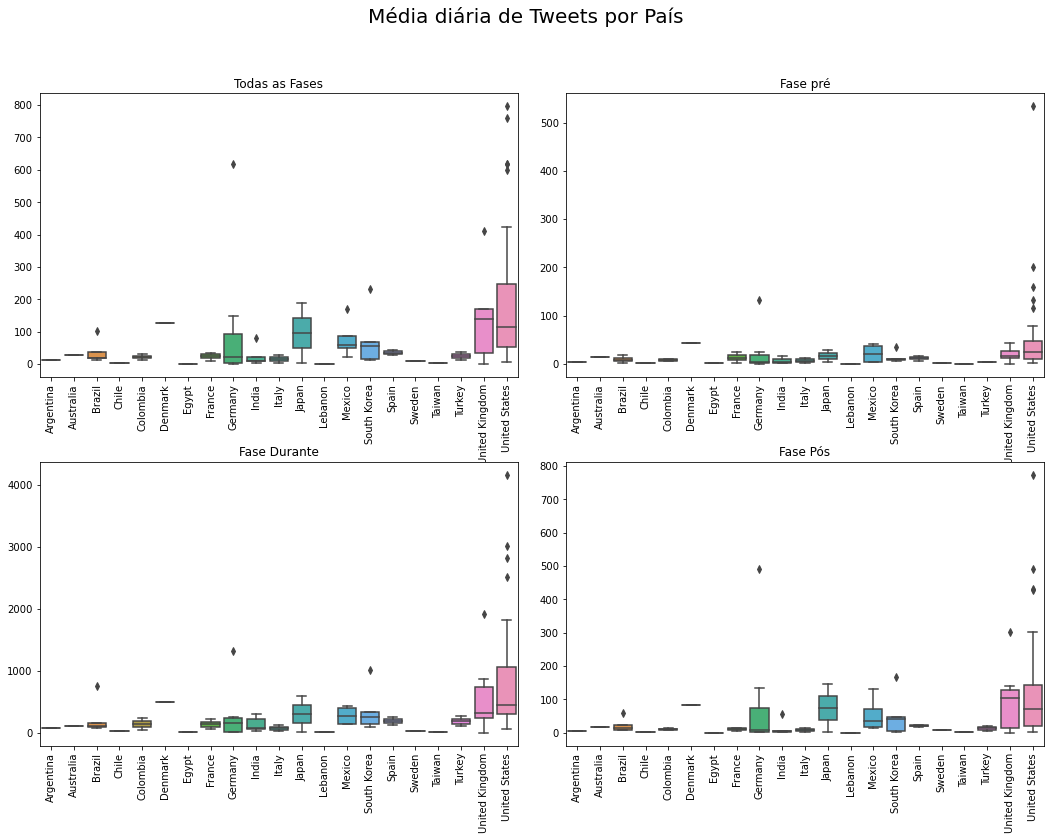

In [79]:
tit = 'Média diária de Tweets por País'
x1 = 'País'
y1 = 'Count'
dfTotal = getCountParam(dados, tipocount = "TaxaTotal", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfPre = getCountParam(dados, tipocount = "TaxaPre", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfDurante = getCountParam(dados, tipocount = "TaxaDurante", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfPos = getCountParam(dados, tipocount = "TaxaPos", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = False)

## Total de Tweets x Idiomas

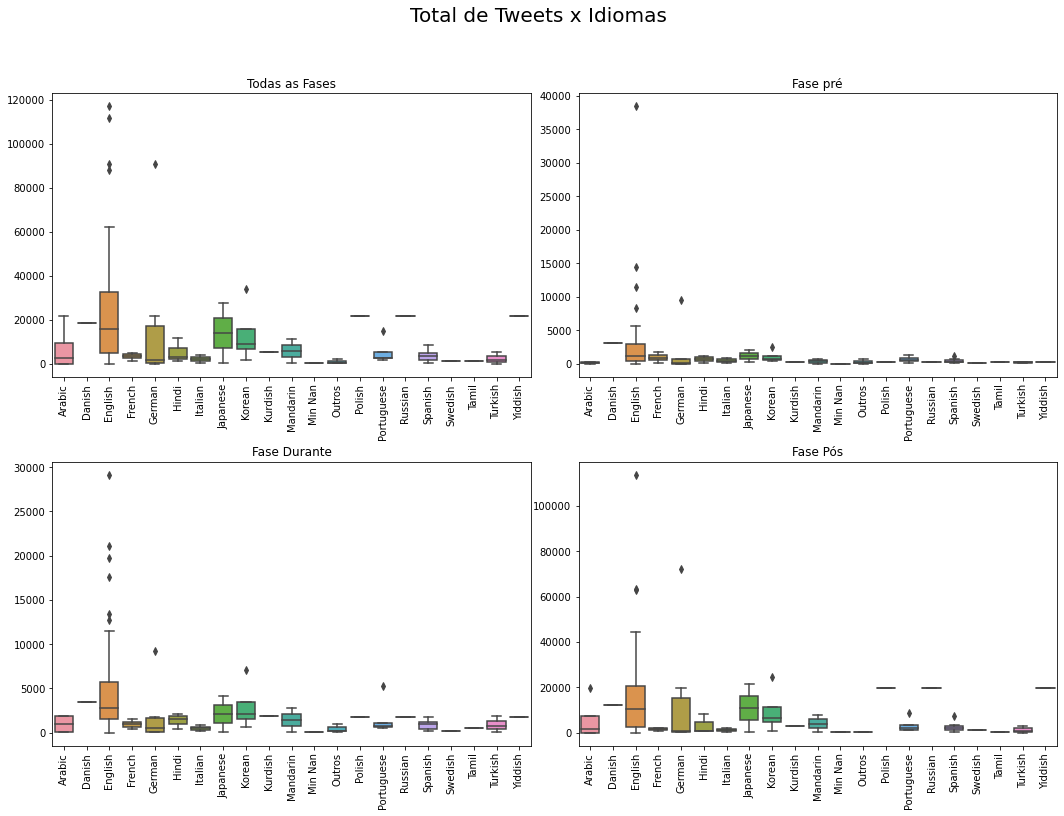

In [80]:
tit = 'Total de Tweets x Idiomas'
x1 = 'Idiomas'
y1 = 'Count'
inicio = "Arabic"
fim = "Yiddish"

dfTotal = getCountParam(dados, tipocount = "CountTotal", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)
dfPre = getCountParam(dados, tipocount = "CountPre", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)
dfDurante = getCountParam(dados, tipocount = "CountDurante", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)
dfPos = getCountParam(dados, tipocount = "CountPos", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = False)

## Taxa de tweets x Idiomas

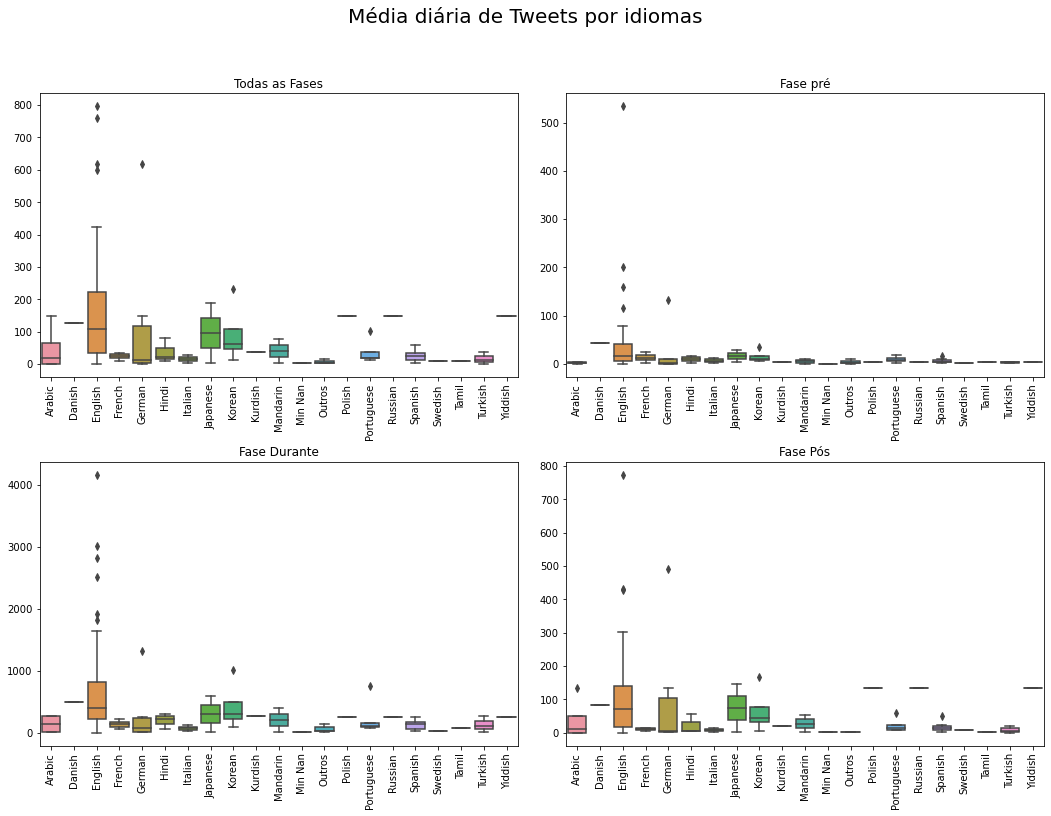

In [81]:
tit = 'Média diária de Tweets por idiomas'
x1 = 'Idiomas'
y1 = 'Count'
inicio = "Arabic"
fim = "Yiddish"

dfTotal = getCountParam(dados, tipocount = "TaxaTotal", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)
dfPre = getCountParam(dados, tipocount = "TaxaPre", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)
dfDurante = getCountParam(dados, tipocount = "TaxaDurante", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)
dfPos = getCountParam(dados, tipocount = "TaxaPos", nome_col1 = y1, nome_col2 = x1, inicio = inicio, fim = fim)

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = False)

## Total de Tweets x Reviews

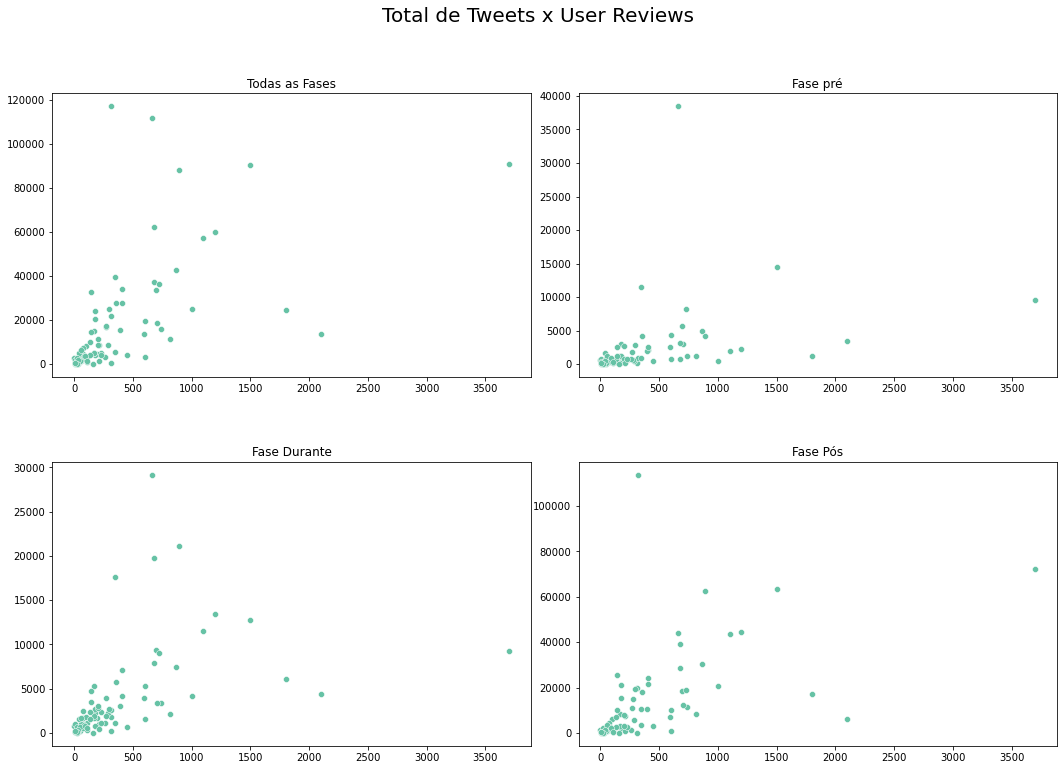

In [82]:
tit = "Total de Tweets x User Reviews"
x1 = "user_reviews"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

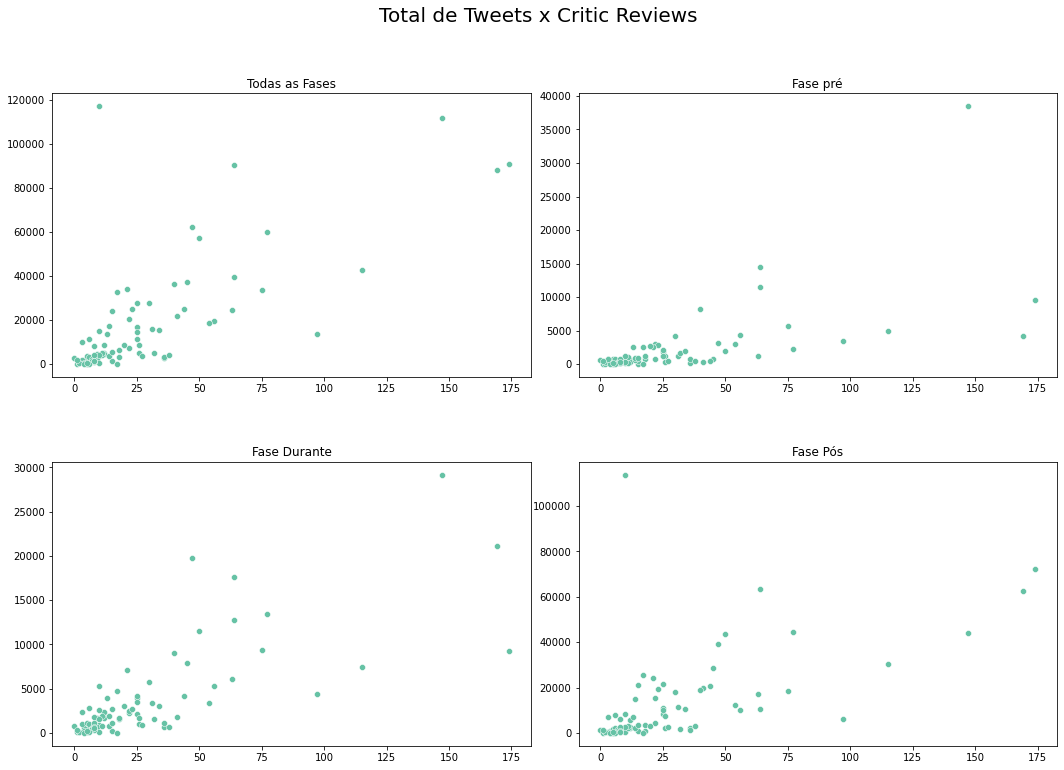

In [83]:
tit = "Total de Tweets x Critic Reviews"
x1 = "critic_reviews"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

## Total de Tweets x Nota

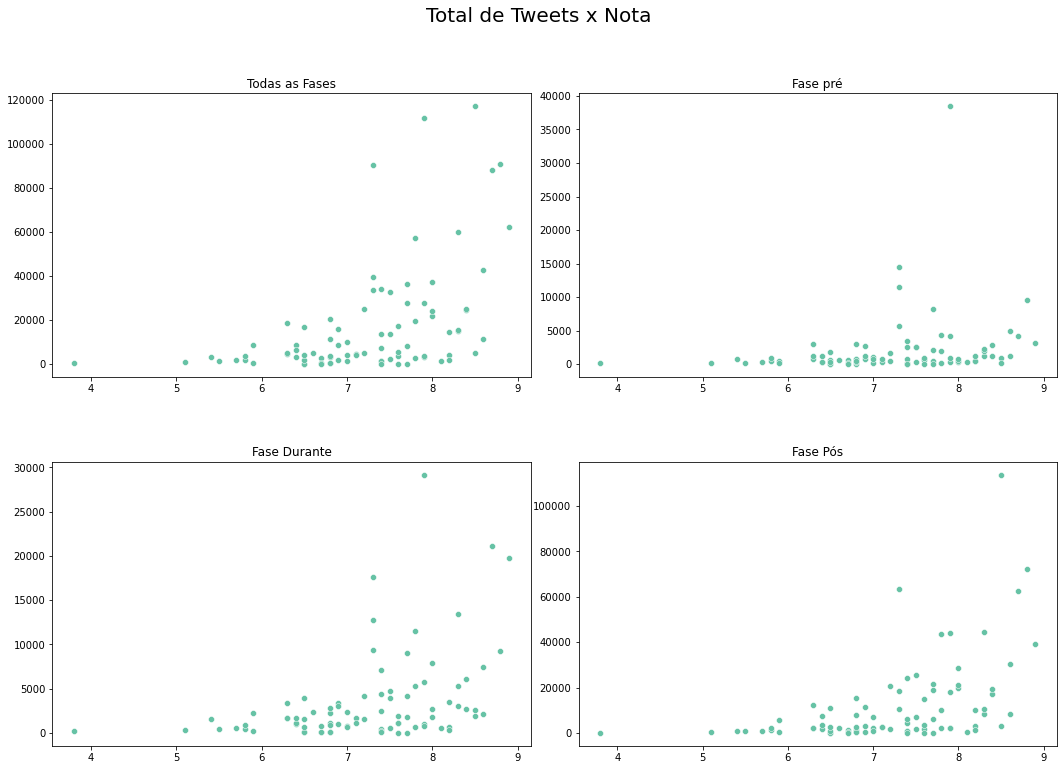

In [84]:
tit = "Total de Tweets x Nota"
x1 = "Nota"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

## Total de Tweets x Votos

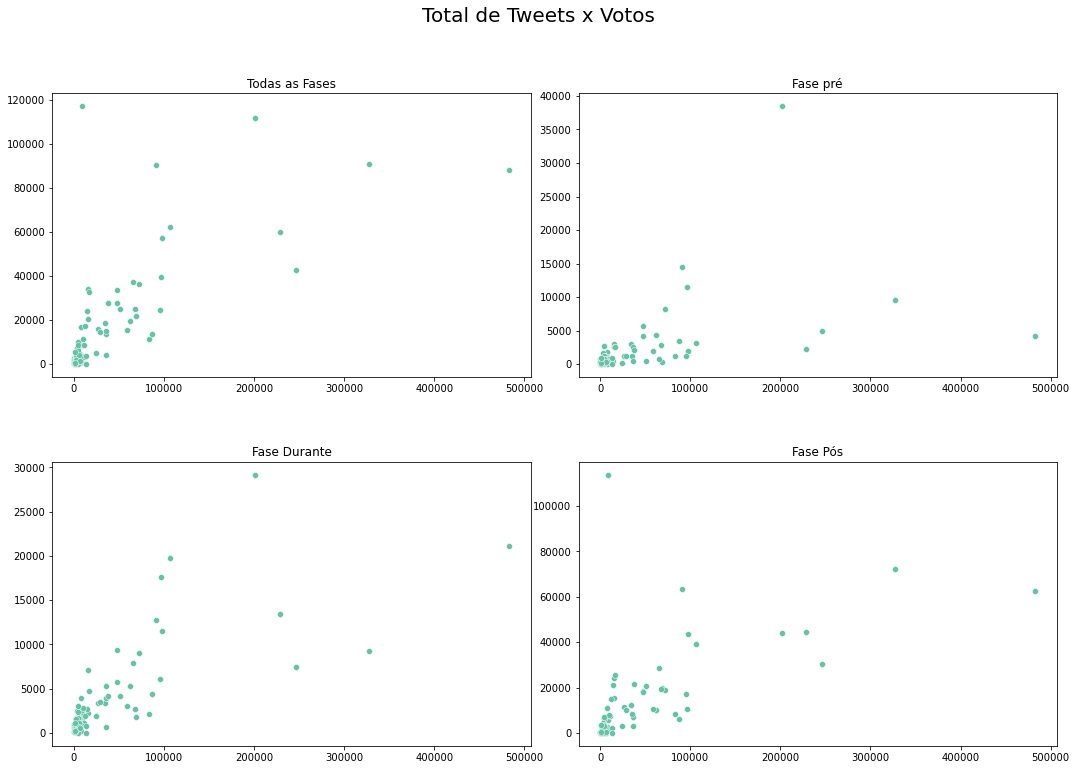

In [85]:
tit = "Total de Tweets x Votos"
x1 = "Votos"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

## Total de Tweets x Número de Episódios

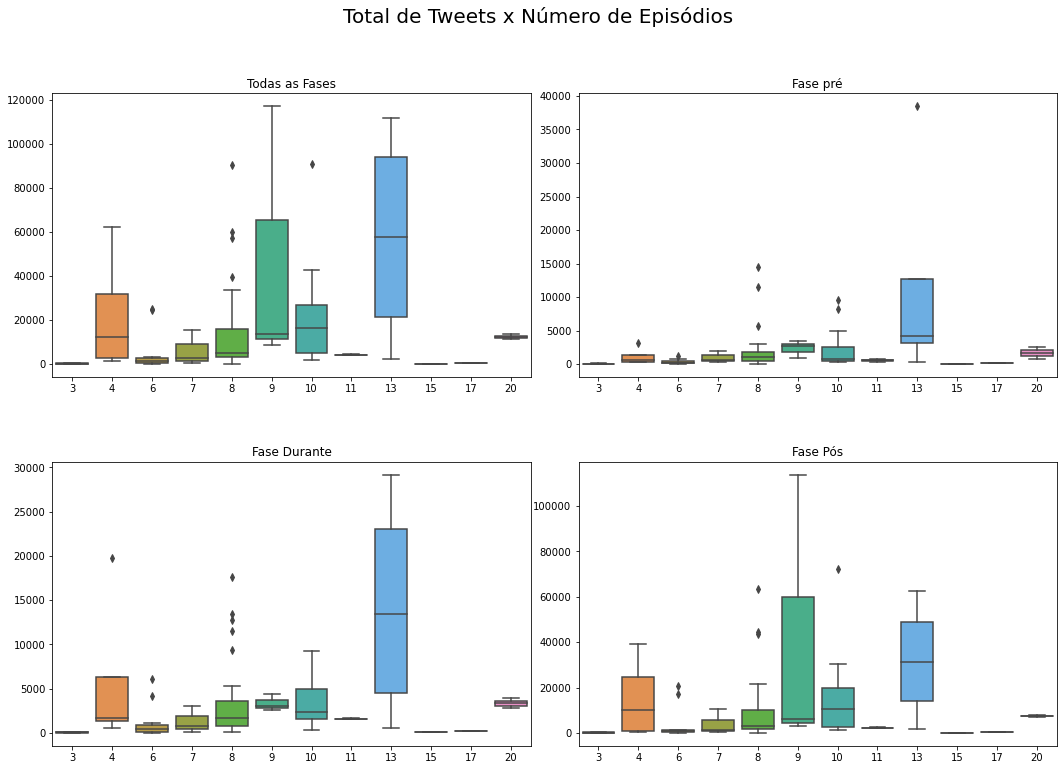

In [86]:
tit = "Total de Tweets x Número de Episódios"
x1 = "Episodios"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0)

## Total de Tweets x Duração dos Episódios

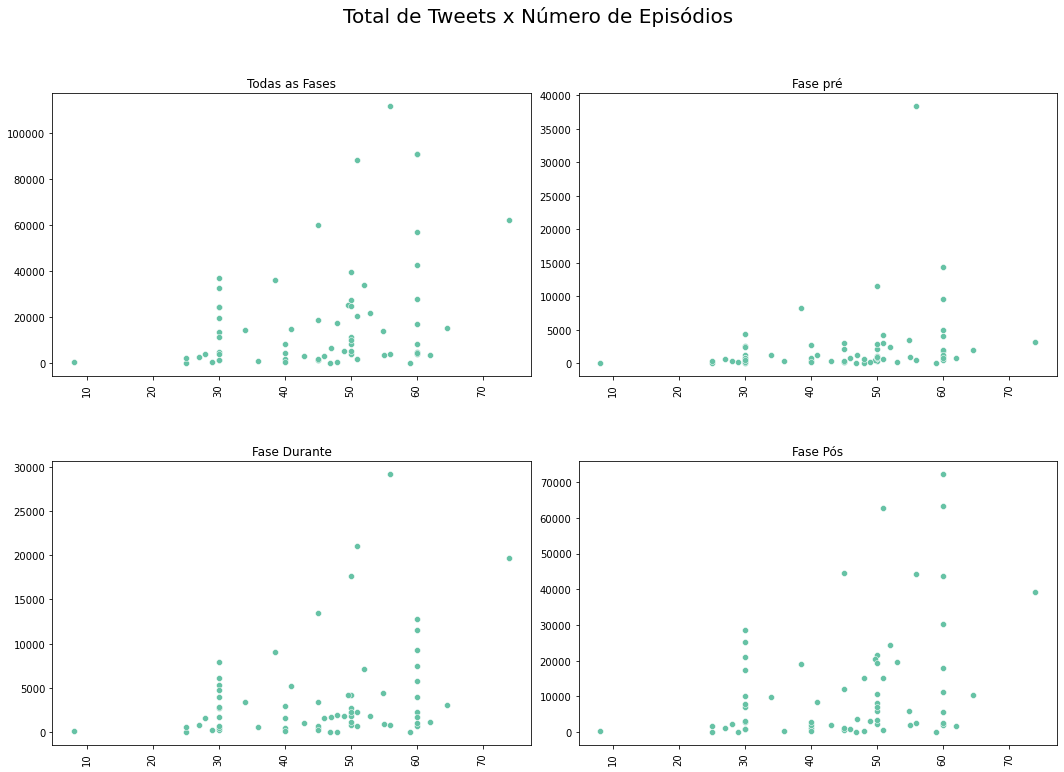

In [87]:
tit = "Total de Tweets x Número de Episódios"
x1 = "Duração"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 90, tipo = tipo_plot)

## Influência de engajamento anterior no posterior

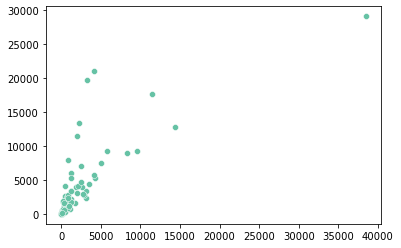

In [88]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.scatterplot(data=dados,  x = "CountPre", y = "CountDurante")
ax.set(xlabel = None, ylabel = None, title = '')
ax.tick_params(axis = 'x', rotation = 0)

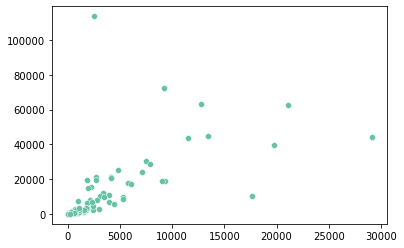

In [89]:
fig, ax = plt.subplots()
sns.set_palette("Set2")
sns.scatterplot(data=dados,  x = "CountDurante", y = "CountPos")
ax.set(xlabel = None, ylabel = None, title = '')
ax.tick_params(axis = 'x', rotation = 0)